# Title : Student Performance Indicator
*Developed by (Name: Sai Sirisha NK)* 


## 1. Introduction

### 1) Introduction/Background of the Data

- The dataset used in this project is based on student performance across three key subjects: math, reading, and writing. The data includes a variety of demographic and socio-economic factors such as gender, race/ethnicity, parental level of education, lunch type (standard or free/reduced), and whether the student completed a test preparation course. Each student's performance in the three subjects is recorded, allowing us to explore the relationships between these factors and academic outcomes.

### 2) Why I'm Interested in This Dataset
- Understanding student performance is critical for educators, and parents, as it can help in tailoring interventions to improve educational outcomes. This dataset presents an excellent opportunity to study the intersection of social and demographic factors that influence academic achievement.




### 3) Data Features (Short Explanation)
- Gender: Student's gender (male or female), useful for analyzing gender-based differences in academic performance.

- Race/Ethnicity: Categorical variable representing the student's race/ethnicity (five groups), helps explore racial disparities in performance.

- Parental Education: Highest education level achieved by the student’s parents, ranging from some high school to a master’s degree, which can influence academic outcomes.

- Lunch Type: Indicates whether the student receives a standard or free/reduced lunch, often a proxy for socio-economic status.

- Test Preparation Course: Shows whether a student completed a test preparation course, which is designed to improve academic performance.

- Math Score: Student’s math test score (out of 100), a key metric for evaluating mathematical proficiency.

- Reading Score: Student’s reading test score (out of 100), reflects verbal comprehension skills.

- Writing Score: Student’s writing test score (out of 100), measures writing and expression abilities.


### 4) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 columns and 1000 rows.

### 5) Research Objectives
- The main objectives of this research are:

1. To analyze how gender and parental education levels interact to influence performance in math, reading, and writing.
2. To explore the combined impact of lunch type (socio-economic factor) and test preparation (academic intervention) on student performance in math, reading, and writing.
3. To compare and contrast the demographic and socio-economic backgrounds of high and low performers to identify factors that contribute to success or underperformance.
4. To investigate whether test preparation courses have a different impact on academic performance based on gender, race, and parental education.

### 6) Goals
1. To identify whether female and male students benefit equally from higher levels of parental education, and if the effect varies between subjects. This information could help schools and educators design personalized strategies based on gender and family background.
2.To understand whether test preparation courses help level the playing field for students from disadvantaged backgrounds and improve their chances of academic success in all subjects.
3. To help design targeted programs that address the needs of low performers while leveraging the strengths of high performers to maximize academic success for all students.
4. To ensure that test preparation programs are equitable and effective for all students, regardless of their background, and to make improvements if certain groups are not benefiting as much as others.

### EDA Hypotheses (Ask you questions)


1. How does gender combined with parental education influence student performance across different subjects?
- Reason for Interest: Understanding the combined effects of gender and parental education can provide insights into the socio-cultural dynamics that shape academic performance. This question helps identify if parental education has a different impact on male and female students across different subjects, which could help target educational interventions more effectively. 
2. How do lunch type and test preparation course completion together influence performance in math, reading, and writing?
- Reason for Interest: Lunch type is often a proxy for socio-economic status, while test preparation courses are designed to enhance academic performance. Examining how these two factors together influence performance could reveal how well educational interventions (like test prep courses) help bridge socio-economic gaps in student achievement.
3. How do top performers (90th percentile and above) differ from low performers (below 25th percentile) based on gender, parental education, lunch type, and race/ethnicity?
- Reason for Interest: Identifying the key characteristics of both top performers and low performers can help educators and policymakers develop targeted interventions to support struggling students while encouraging high performers. Understanding how socio-economic factors, gender, and race influence these two groups can shed light on existing educational inequalities.
4. How does completing the test preparation course affect performance differently across gender, race, and parental education?
- Reason for Interest: Test preparation courses are intended to enhance academic performance, but the benefits may not be evenly distributed across different groups. Exploring whether the course has a differential impact based on gender, race, or parental education can help assess the equity and effectiveness of such interventions.

## 2. Data Analysis

### 2-1. Importing the libraries necessary for your EDA



In [25]:
# Import your data easy to read
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('StudentsPerformance.xlsx')
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

### 2-2. Import libraries for EDA


In [26]:
# Import libraries for EDA 
## Imported required libraries in 2.1 already
# Import your data easy to read
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2-3. Review Data


In [27]:
# 1. Check data dimension by using .shape

df.shape  ## displays number of rows and columns in dataframe 

(1000, 8)

In [28]:
# 2. Check types of data by .info() ; .dtype
df.info()   ## Gives an over all information about the data types, non null values of each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
df.dtypes  ## displays data types of all the variables in the dataframe

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [30]:
# 3. For quantitative variable, generate a table for the count, mean, standard deviation, minimum and maximum values and the quantities of the data 
df.describe() ## displays descriptive statistics summary for numeric variables

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

### 2-4. Generate Sub-dataset

In [31]:
# 1. Make sub-dataset(s) from your original dataset for your research objective, goals by dropping unnecessary variables 

# Sub-dataset for gender and parental education analysis
gender_parental_education_df = df[['gender', 'parental level of education', 'math score', 'reading score', 'writing score']]

# Sub-dataset for lunch type and test preparation course analysis
lunch_testprep_df = df[['lunch', 'test preparation course', 'math score', 'reading score', 'writing score']]

# Sub-dataset for analyzing top and low performers based on various factors
performance_factors_df = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'math score', 'reading score', 'writing score']]

# Sub-dataset for analyzing the impact of test preparation course on performance by gender, race, and parental education
testprep_analysis_df = df[['gender', 'race/ethnicity', 'parental level of education', 'test preparation course', 'math score', 'reading score', 'writing score']]

In [32]:
# 2. try to change variable names

# Renaming columns in all sub-datasets using .rename function from pandas

gender_parental_education_df = gender_parental_education_df.rename(columns={
    'math score': 'Math_Score',
    'reading score': 'Reading_Score',
    'writing score': 'Writing_Score',
    'parental level of education': 'Parental_Education_Level'
})

#renaming the columns in dataframe

lunch_testprep_df = lunch_testprep_df.rename(columns={
    'math score': 'Math_Score',
    'reading score': 'Reading_Score',
    'writing score': 'Writing_Score',
    'test preparation course': 'Test_Prep_Course'
})

performance_factors_df = performance_factors_df.rename(columns={
    'math score': 'Math_Score',
    'reading score': 'Reading_Score',
    'writing score': 'Writing_Score',
    'parental level of education': 'Parental_Education_Level'
})


testprep_analysis_df = testprep_analysis_df.rename(columns={
    'math score': 'Math_Score',
    'reading score': 'Reading_Score',
    'writing score': 'Writing_Score',
    'parental level of education': 'Parental_Education_Level',
    'test preparation course': 'Test_Prep_Course'
})

In [33]:
# 3. check if there are missing values

# checking for null values inside all the columns of a dataframe by calling isnull and summing up all the null values in each column using .sum()

# Checking for missing values in gender and parental education dataset
missing_gender_parental_education = gender_parental_education_df.isnull().sum()

# Checking for missing values in lunch type and test preparation dataset
missing_lunch_testprep = lunch_testprep_df.isnull().sum()

# Checking for missing values in high and low performers dataset
missing_performance_factors = performance_factors_df.isnull().sum()


# Checking for missing values in test preparation course analysis dataset
missing_testprep_analysis = testprep_analysis_df.isnull().sum()

# Displaying the missing values check for all datasets
print("missing values in gender and parental education dataset")
print(missing_gender_parental_education)
print("\n")
print("missing values in lunch type and test preparation dataset")
print(missing_lunch_testprep)
print("\n")
print("missing values in high and low performers dataset")
print(missing_performance_factors)
print("\n")
print("\n")
print("missing values in test preparation course analysis dataset")
print(missing_testprep_analysis)

missing values in gender and parental education dataset
gender                      0
Parental_Education_Level    0
Math_Score                  0
Reading_Score               0
Writing_Score               0
dtype: int64


missing values in lunch type and test preparation dataset
lunch               0
Test_Prep_Course    0
Math_Score          0
Reading_Score       0
Writing_Score       0
dtype: int64


missing values in high and low performers dataset
gender                      0
race/ethnicity              0
Parental_Education_Level    0
lunch                       0
Math_Score                  0
Reading_Score               0
Writing_Score               0
dtype: int64




missing values in test preparation course analysis dataset
gender                      0
race/ethnicity              0
Parental_Education_Level    0
Test_Prep_Course            0
Math_Score                  0
Reading_Score               0
Writing_Score               0
dtype: int64


In [11]:
# 4. Check if there are duplicated values

# .duplicated() will return a boolean Series where each element is True if that row is a duplicate of a previous row, and False otherwise.
# .sum() adds up the True values ( True is treated as 1 and False as 0), giving the total number of duplicate rows.

# Checking for duplicated values in gender and parental education dataset
duplicates_gender_parental_education = gender_parental_education_df.duplicated().sum()

# Checking for duplicated values in lunch type and test preparation dataset
duplicates_lunch_testprep = lunch_testprep_df.duplicated().sum()

# Checking for duplicated values in high and low performers dataset
duplicates_performance_factors = performance_factors_df.duplicated().sum()


# Checking for duplicated values in test preparation course analysis dataset
duplicates_testprep_analysis = testprep_analysis_df.duplicated().sum()

# Displaying the duplicated values check for all datasets
print("duplicated values in gender and parental education dataset",duplicates_gender_parental_education)
print("duplicated values in lunch type and test preparation dataset", duplicates_lunch_testprep)
print("duplicated values in high and low performers dataset",duplicates_performance_factors)
print("duplicated values in test preparation course analysis dataset",duplicates_testprep_analysis)


duplicated values in gender and parental education dataset 3
duplicated values in lunch type and test preparation dataset 6
duplicated values in high and low performers dataset 0
duplicated values in test preparation course analysis dataset 1


In [12]:
# .drop_duplicates() removes duplicate rows from the DataFrame based on specified criteria
# Removing the duplicates from gender and parental education dataset
gender_parental_education_df_cleaned = gender_parental_education_df.drop_duplicates()

# Removing duplicates from lunch type and test preparation dataset
lunch_testprep_df_cleaned = lunch_testprep_df.drop_duplicates()

# Removing duplicates from test preparation course analysis dataset
testprep_analysis_df_cleaned = testprep_analysis_df.drop_duplicates()

# Verifying if duplicates are removed
duplicates_gender_parental_education_cleaned = gender_parental_education_df_cleaned.duplicated().sum()
duplicates_lunch_testprep_cleaned = lunch_testprep_df_cleaned.duplicated().sum()
duplicates_testprep_analysis_cleaned = testprep_analysis_df_cleaned.duplicated().sum()

# Displaying the results after removing duplicates
duplicates_gender_parental_education_cleaned, duplicates_lunch_testprep_cleaned, duplicates_testprep_analysis_cleaned

(0, 0, 0)

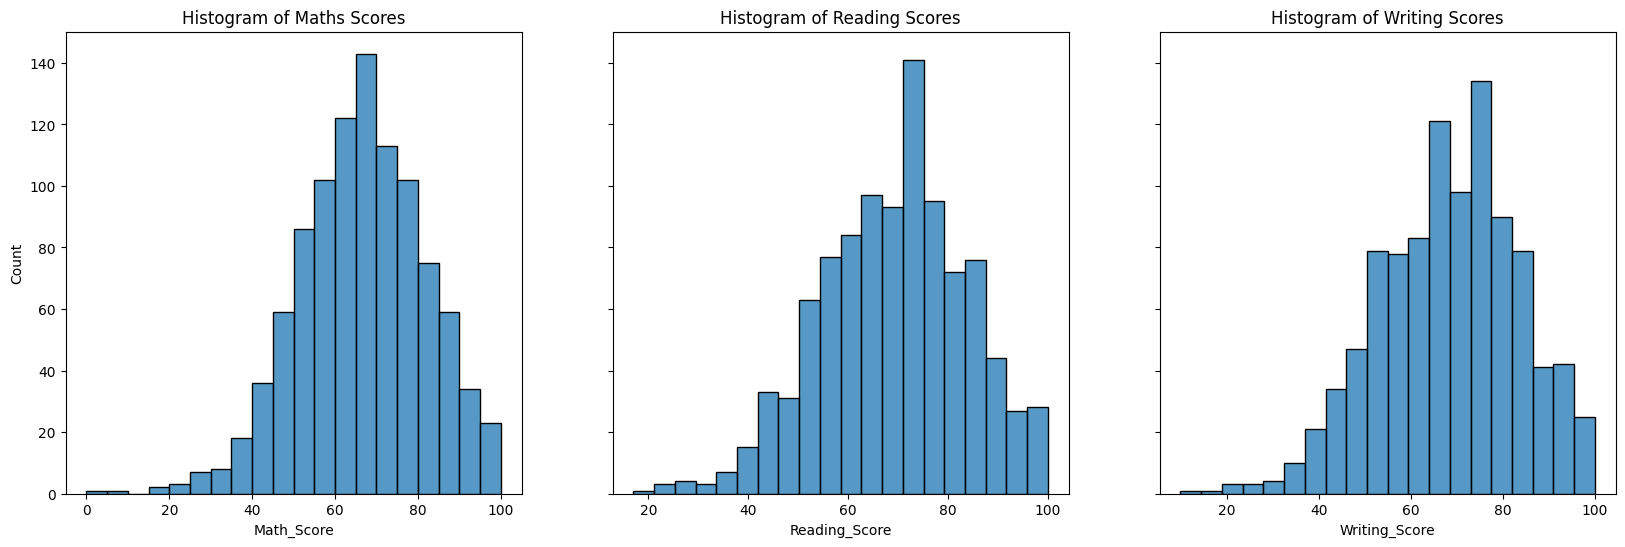

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
sns.histplot(data=lunch_testprep_df_cleaned, x='Math_Score', kde=False,  bins=20, ax=axes[0])
axes[0].set_title('Histogram of Maths Scores')
sns.histplot(data=lunch_testprep_df_cleaned, x='Reading_Score', kde=False,  bins=20, ax=axes[1])
axes[1].set_title('Histogram of Reading Scores')
sns.histplot(data=lunch_testprep_df_cleaned, x='Writing_Score', kde=False,  bins=20, ax=axes[2])
axes[2].set_title('Histogram of Writing Scores')
plt.show()

### 2-5. Checking Outliers

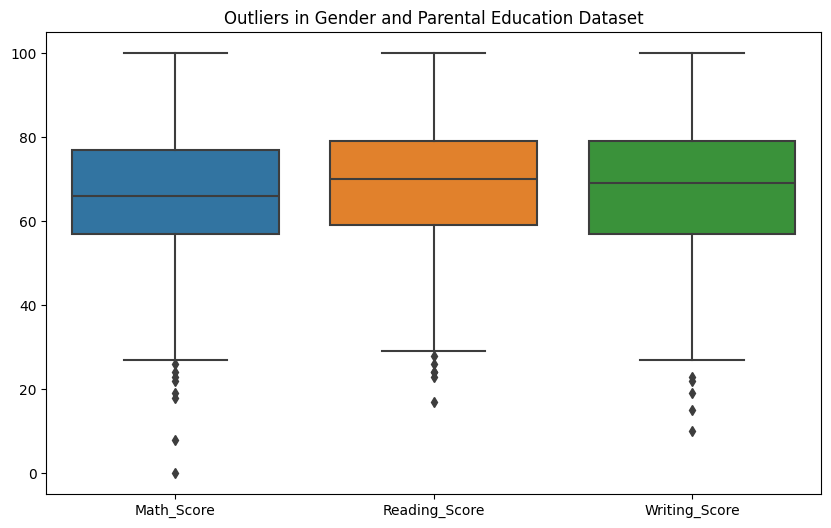

In [14]:
# check if quantitative variables have outliers.

# Function to create box plots for detecting outliers in quantitative variables
def plot_boxplots(dataset, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataset[['Math_Score', 'Reading_Score', 'Writing_Score']])
    plt.title(title)
    plt.show()

# Checking for outliers in each dataset's quantitative variables (Math, Reading, Writing Scores)

# Gender and Parental Education Dataset
plot_boxplots(gender_parental_education_df_cleaned, "Outliers in Gender and Parental Education Dataset")


Remaining datasets are also sharing the same numerical variables so the distribution will be same

In [15]:
# Removing outliers using the IQR method in all datasets

def remove_outliers(df, column_names):
    df_cleaned = df.copy()
    for column in column_names:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        # Remove rows where the value is below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR for the current column
        df_cleaned = df_cleaned[~((df_cleaned[column] < (Q1 - 1.5 * IQR)) | (df_cleaned[column] > (Q3 + 1.5 * IQR)))]
    return df_cleaned

# Applying to all datasets
gender_parental_education_df_cleaned = remove_outliers(gender_parental_education_df_cleaned, ['Math_Score', 'Reading_Score', 'Writing_Score'])
lunch_testprep_df_cleaned = remove_outliers(lunch_testprep_df_cleaned, ['Math_Score', 'Reading_Score', 'Writing_Score'])
performance_factors_df_cleaned = remove_outliers(performance_factors_df, ['Math_Score', 'Reading_Score', 'Writing_Score'])
testprep_analysis_df_cleaned = remove_outliers(testprep_analysis_df_cleaned, ['Math_Score', 'Reading_Score', 'Writing_Score'])

# Display the shape of datasets after removing outliers
gender_parental_education_df_cleaned.shape, lunch_testprep_df_cleaned.shape, performance_factors_df_cleaned.shape, testprep_analysis_df_cleaned.shape


((983, 5), (980, 5), (986, 7), (985, 7))

### 2-6. Generating Plot(s)

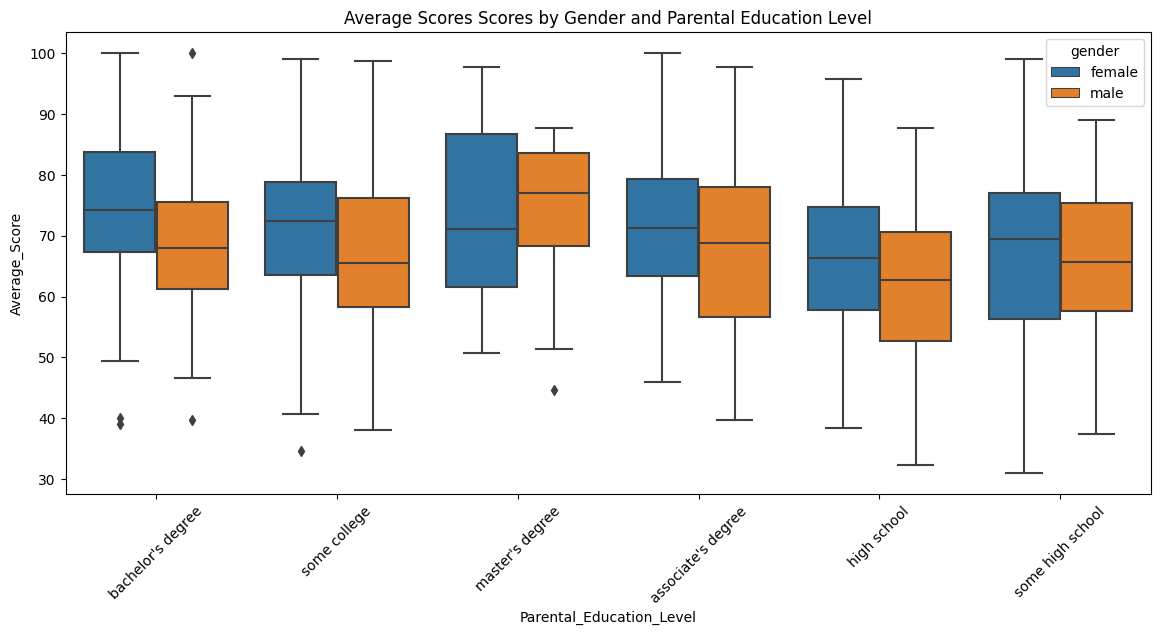

In [16]:
# generate plots to support your objective and goals

## Creating an average score column
gender_parental_education_df_cleaned['Average_Score'] = (gender_parental_education_df_cleaned['Math_Score'] +  gender_parental_education_df_cleaned['Writing_Score'] + gender_parental_education_df_cleaned['Reading_Score'])/3

# Boxplot for Average Scores by Gender and Parental Education Level - Objective 1
plt.figure(figsize=(14, 6))
sns.boxplot(x='Parental_Education_Level', y='Average_Score', hue='gender', data=gender_parental_education_df_cleaned)
plt.title('Average Scores Scores by Gender and Parental Education Level')
plt.xticks(rotation=45)
plt.show()



This above plot is illustrating how the performances are varing between genders and how parental education is impacting the student outcomes.

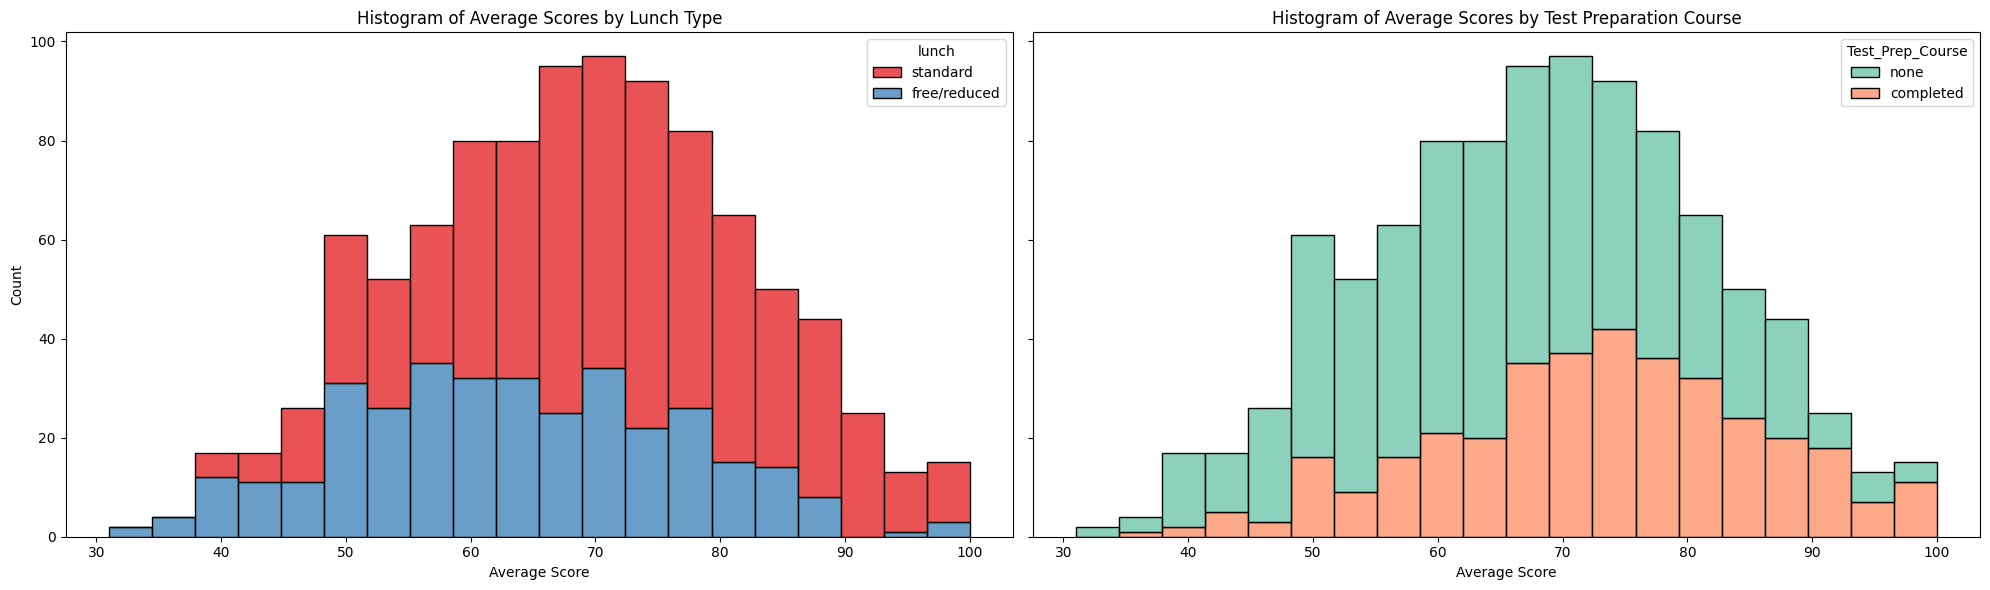

In [17]:
# Box plot for Average Scores by Lunch Type and Test Preparation Course -  Objective 2
## Creating an average score column
lunch_testprep_df_cleaned['Average_Score'] = (lunch_testprep_df_cleaned['Math_Score'] +  lunch_testprep_df_cleaned['Writing_Score'] + lunch_testprep_df_cleaned['Reading_Score'])/3

# Creating subplots side by side for histogram of average scores by Lunch Type and Test Preparation Course
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Histogram for Average Scores by Lunch Type
sns.histplot(data=lunch_testprep_df_cleaned, x='Average_Score', hue='lunch', kde=False, multiple='stack', palette="Set1", bins=20, ax=axes[0])
axes[0].set_title('Histogram of Average Scores by Lunch Type')
axes[0].set_xlabel('Average Score')
axes[0].set_ylabel('Count')

# Histogram for Average Scores by Test Preparation Course
sns.histplot(data=lunch_testprep_df_cleaned, x='Average_Score', hue='Test_Prep_Course', kde=False, multiple='stack', palette="Set2", bins=20, ax=axes[1])
axes[1].set_title('Histogram of Average Scores by Test Preparation Course')
axes[1].set_xlabel('Average Score')

plt.tight_layout()
plt.show()


This above plots are showing how the lunch type (socio-economic factor) and test preparation course completion are affect average scores

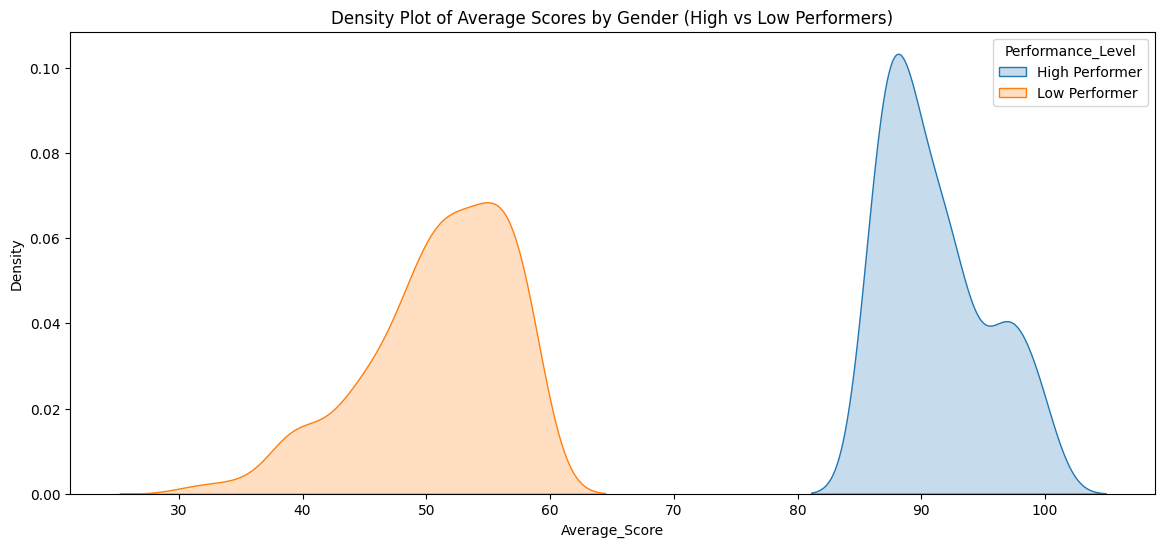

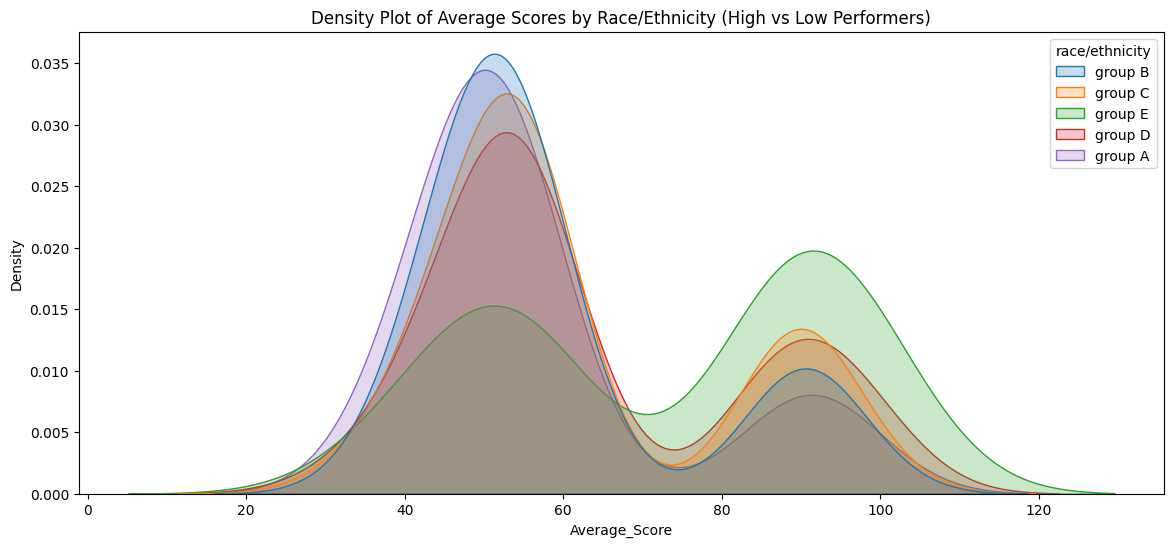

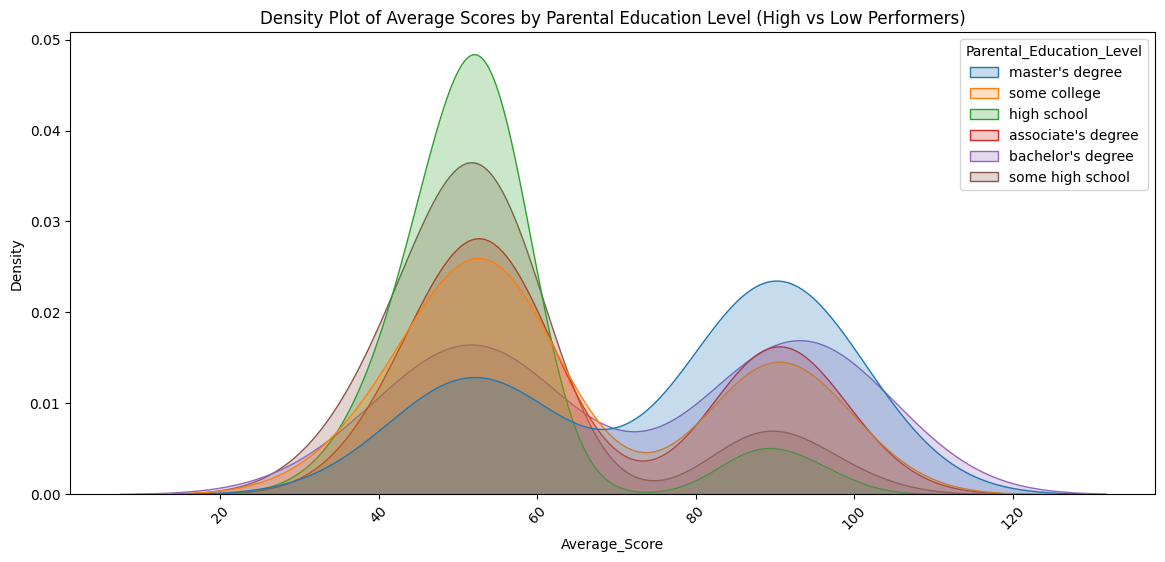

In [18]:
# Boxplot for Average Scores by Gender, Race/Ethnicity and Praent's Education for Top and Low Performers  Objective 3

## Creating an average score column
performance_factors_df_cleaned['Average_Score'] = (performance_factors_df_cleaned['Math_Score'] +  performance_factors_df_cleaned['Writing_Score'] + performance_factors_df_cleaned['Reading_Score'])/3
# Define the 90th percentile as high performers and below 25th percentile as low performers
high_performer_threshold = performance_factors_df_cleaned['Average_Score'].quantile(0.90)
low_performer_threshold = performance_factors_df_cleaned['Average_Score'].quantile(0.25)

# Filter high performers (90th percentile and above) and low performers (below 25th percentile)
high_performers = performance_factors_df_cleaned[performance_factors_df_cleaned['Average_Score'] >= high_performer_threshold]
low_performers = performance_factors_df_cleaned[performance_factors_df_cleaned['Average_Score'] <= low_performer_threshold]



# Create a new column in both DataFrames to label high and low performers
high_performers['Performance_Level'] = 'High Performer'
low_performers['Performance_Level'] = 'Low Performer'

# Concatenate the two DataFrames
combined_df = pd.concat([high_performers, low_performers])

# Density plot to compare high and low performers based on gender
plt.figure(figsize=(14, 6))
sns.kdeplot(data=combined_df, x='Average_Score', hue='Performance_Level', fill=True, common_norm=False)
plt.title('Density Plot of Average Scores by Gender (High vs Low Performers)')
plt.show()

# Density plot to compare high and low performers based on race/ethnicity
plt.figure(figsize=(14, 6))
sns.kdeplot(data=combined_df, x='Average_Score', hue='race/ethnicity', fill=True, common_norm=False)
plt.title('Density Plot of Average Scores by Race/Ethnicity (High vs Low Performers)')
plt.show()

# Density plot to compare high and low performers based on parental education level
plt.figure(figsize=(14, 6))
sns.kdeplot(data=combined_df, x='Average_Score', hue='Parental_Education_Level', fill=True, common_norm=False)
plt.title('Density Plot of Average Scores by Parental Education Level (High vs Low Performers)')
plt.xticks(rotation=45)
plt.show()

The above density plots will help in comparing high and low performers based on gender, race/ethnicity, and parental education levels and this comparison will highlight the demographic and socio-economic factors that contributes to success or to the underperformance.

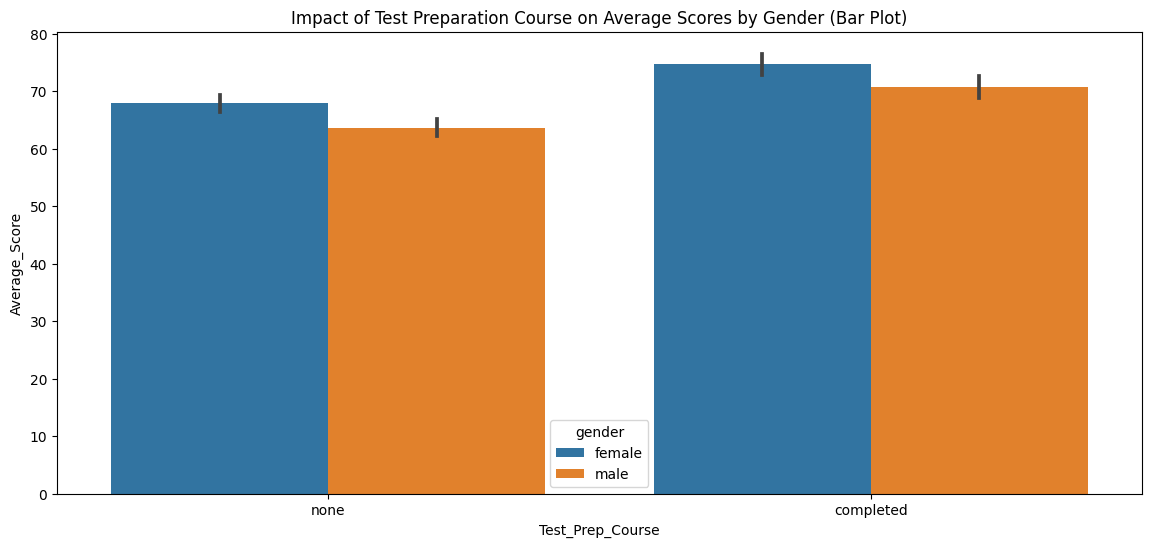

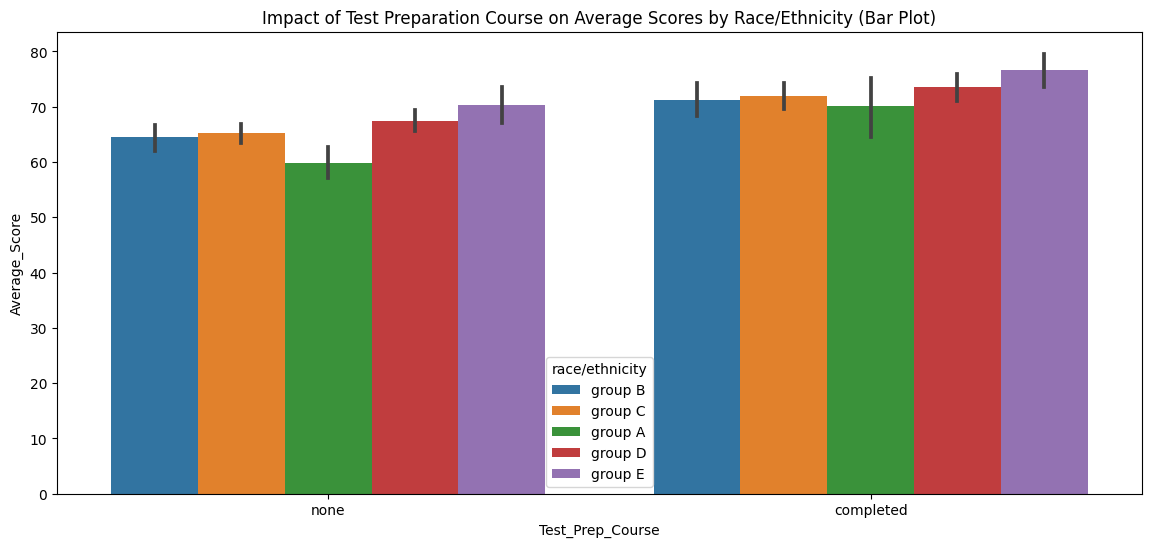

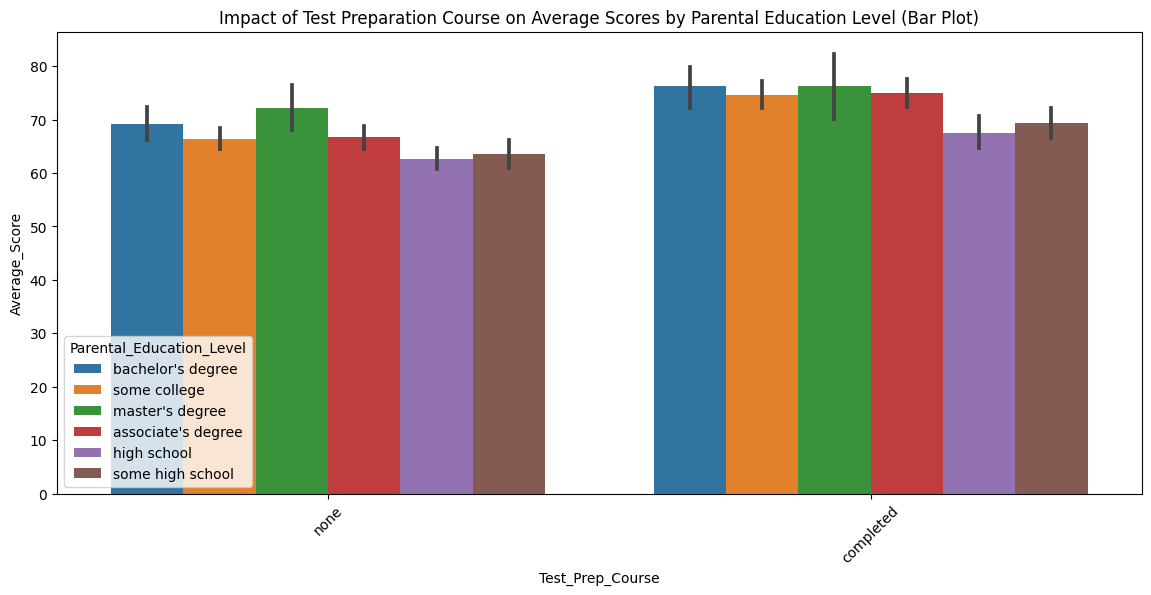

In [19]:
# Histogram for Average Scores by Test Preparation - Objective 4

testprep_analysis_df_cleaned['Average_Score'] = (testprep_analysis_df_cleaned['Math_Score'] +  testprep_analysis_df_cleaned['Writing_Score'] + testprep_analysis_df_cleaned['Reading_Score'])/3

# Bar plot for Test Preparation Course and Average Score across Gender
plt.figure(figsize=(14, 6))
sns.barplot(x='Test_Prep_Course', y='Average_Score', hue='gender', data=testprep_analysis_df_cleaned)
plt.title('Impact of Test Preparation Course on Average Scores by Gender (Bar Plot)')
plt.show()

# Bar plot for Test Preparation Course and Average Score across Race/Ethnicity
plt.figure(figsize=(14, 6))
sns.barplot(x='Test_Prep_Course', y='Average_Score', hue='race/ethnicity', data=testprep_analysis_df_cleaned)
plt.title('Impact of Test Preparation Course on Average Scores by Race/Ethnicity (Bar Plot)')
plt.show()

# Bar plot for Test Preparation Course and Average Score across Parental Education Level
plt.figure(figsize=(14, 6))
sns.barplot(x='Test_Prep_Course', y='Average_Score', hue='Parental_Education_Level', data=testprep_analysis_df_cleaned)
plt.title('Impact of Test Preparation Course on Average Scores by Parental Education Level (Bar Plot)')
plt.xticks(rotation=45)
plt.show()


The above plots show how the test preparation courses is having a different impact on Average Score based on gender, race, and parental education

## 3. EDA


Question-1: How does gender combined with parental education influence student performance across different subjects?

In [20]:
gender_parental_education_df_cleaned.describe()

Math_Score  Reading_Score  Writing_Score  Average_Score
count  983.000000     983.000000     983.000000     983.000000
mean    66.681587      69.687691      68.605290      68.324856
std     14.354237      13.909480      14.421741      13.461420
min     27.000000      31.000000      32.000000      31.000000
25%     57.000000      60.000000      58.000000      58.666667
50%     67.000000      70.000000      69.000000      68.666667
75%     77.000000      80.000000      79.000000      78.000000
max    100.000000     100.000000     100.000000     100.000000

<Figure size 1600x1000 with 0 Axes>

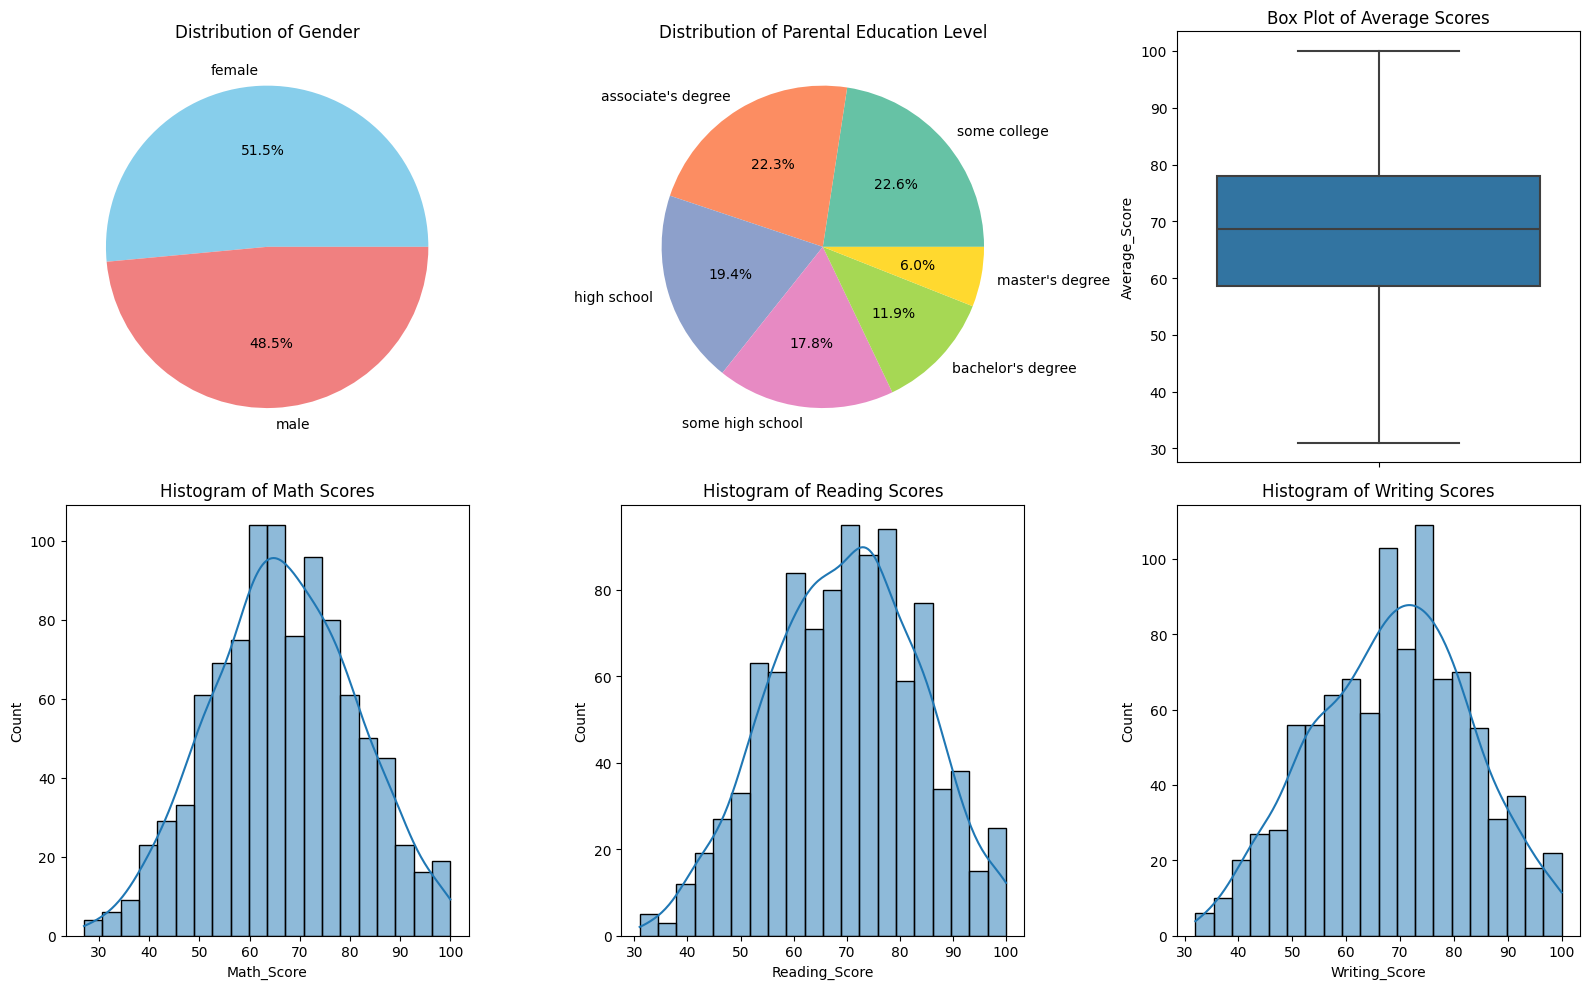

In [19]:
# perform your EDA
## Univariate Analysis

# Correcting the Density Plot for Univariate Analysis
# Since there is an issue with fill=True, we will set it to False to avoid the error.

# Let's correct the plots and ensure all requested plots are properly generated with accuracy, including for gender.
# We will proceed with univariate, bivariate, and multivariate analyses as requested.

plt.figure(figsize=(16, 10))
# Creating 4 univariate analysis plots in one figure

plt.figure(figsize=(16, 10))

# Pie chart for Gender Distribution
plt.subplot(2, 3, 1)
gender_counts = gender_parental_education_df_cleaned['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')

# Pie chart for Parental Education Level Distribution
plt.subplot(2, 3, 2)
parental_education_counts = gender_parental_education_df_cleaned['Parental_Education_Level'].value_counts()
plt.pie(parental_education_counts, labels=parental_education_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Parental Education Level')

# Histogram for Average Score
plt.subplot(2, 3, 3)
sns.boxplot(y=gender_parental_education_df_cleaned['Average_Score'])
plt.title('Box Plot of Average Scores')

# Box Plot for Average Score
plt.subplot(2, 3, 4)
sns.histplot(gender_parental_education_df_cleaned['Math_Score'], kde=True, bins=20)
plt.title('Histogram of Math Scores')

plt.subplot(2, 3, 5)
sns.histplot(gender_parental_education_df_cleaned['Reading_Score'], kde=True, bins=20)
plt.title('Histogram of Reading Scores')

plt.subplot(2, 3, 6)
sns.histplot(gender_parental_education_df_cleaned['Writing_Score'], kde=True, bins=20)
plt.title('Histogram of Writing Scores')

plt.tight_layout()
plt.show()


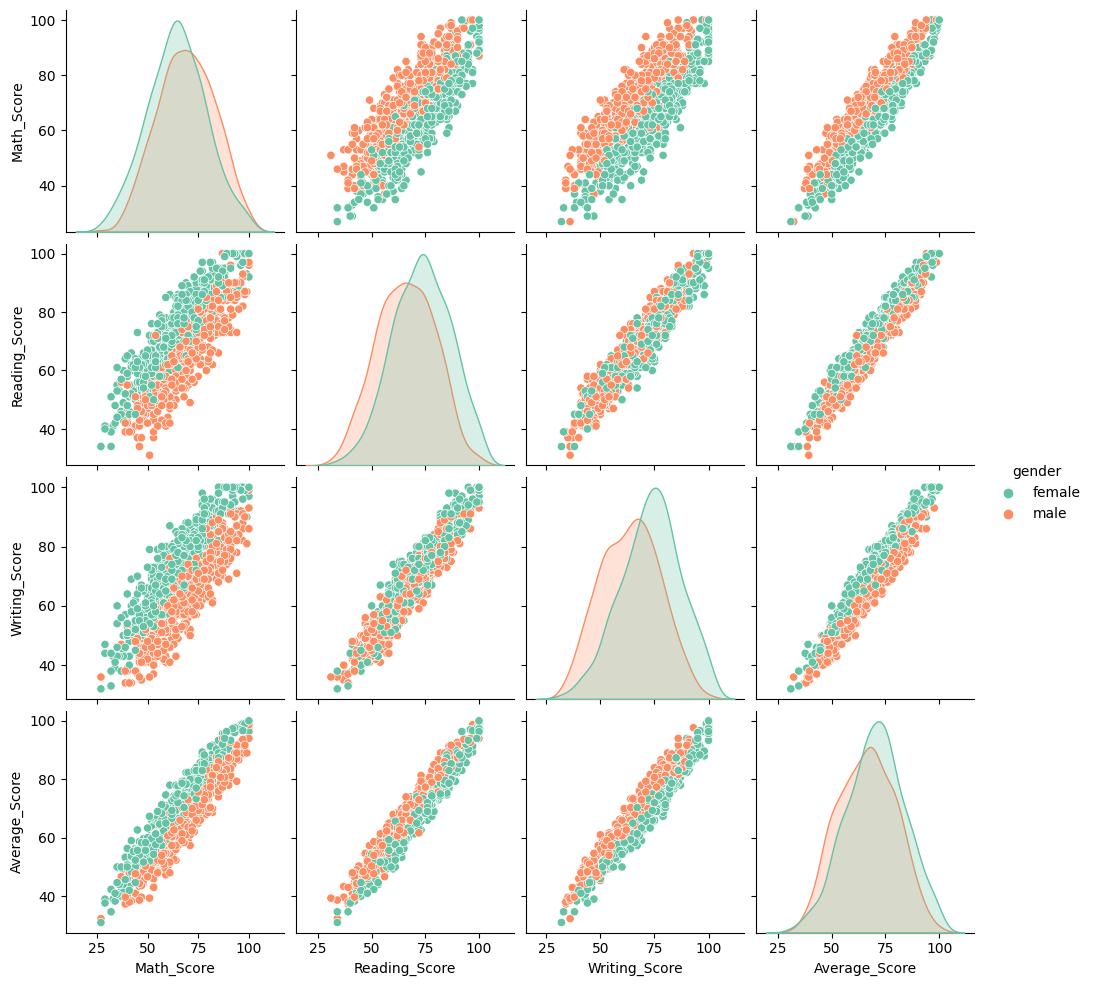

In [20]:
## Bivariate Analysis
# Pairplot for gender, parental education, and scores
sns.pairplot(gender_parental_education_df_cleaned, hue='gender', vars=['Math_Score', 'Reading_Score', 'Writing_Score', 'Average_Score'], palette='Set2')
plt.show()


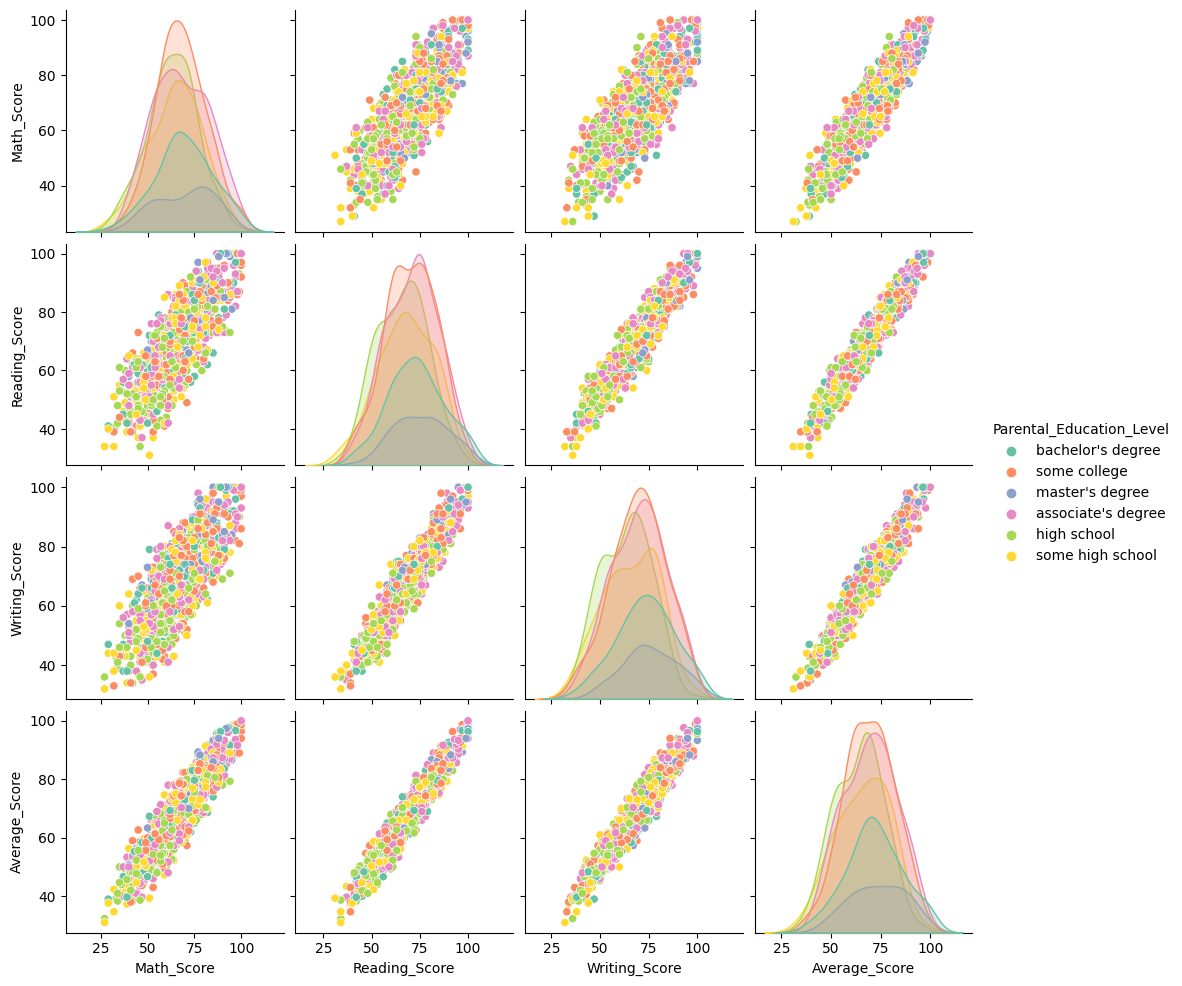

In [21]:
sns.pairplot(gender_parental_education_df_cleaned, hue='Parental_Education_Level', vars=['Math_Score', 'Reading_Score', 'Writing_Score', 'Average_Score'], palette='Set2')
plt.show()

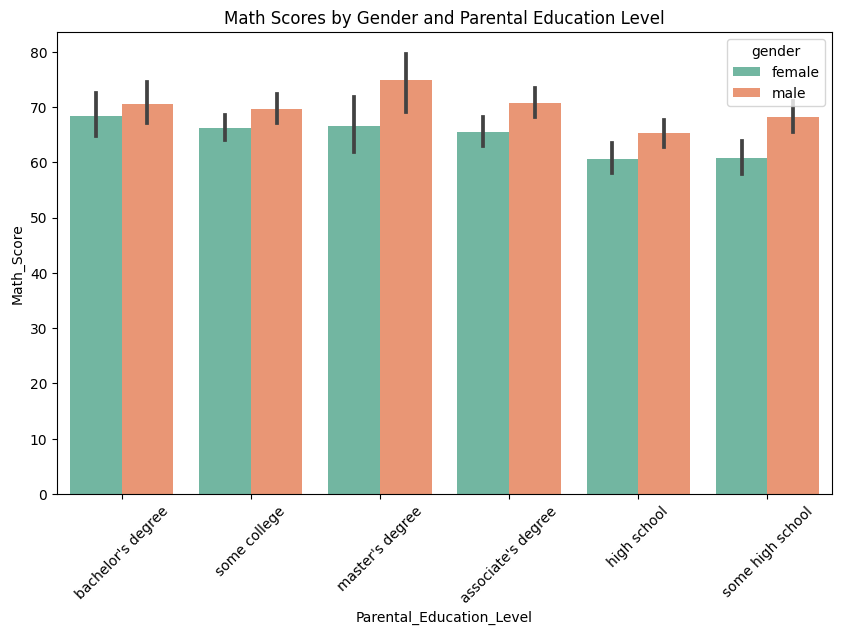

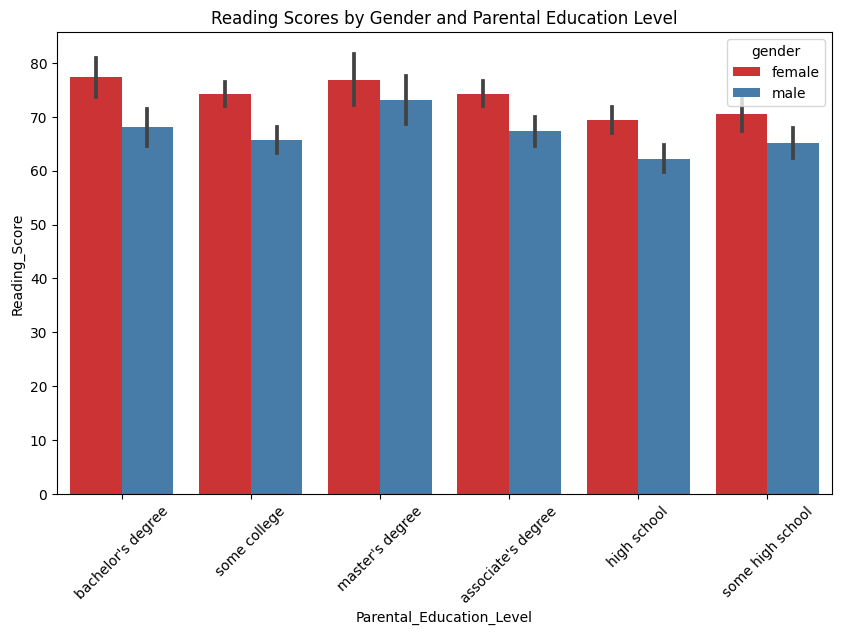

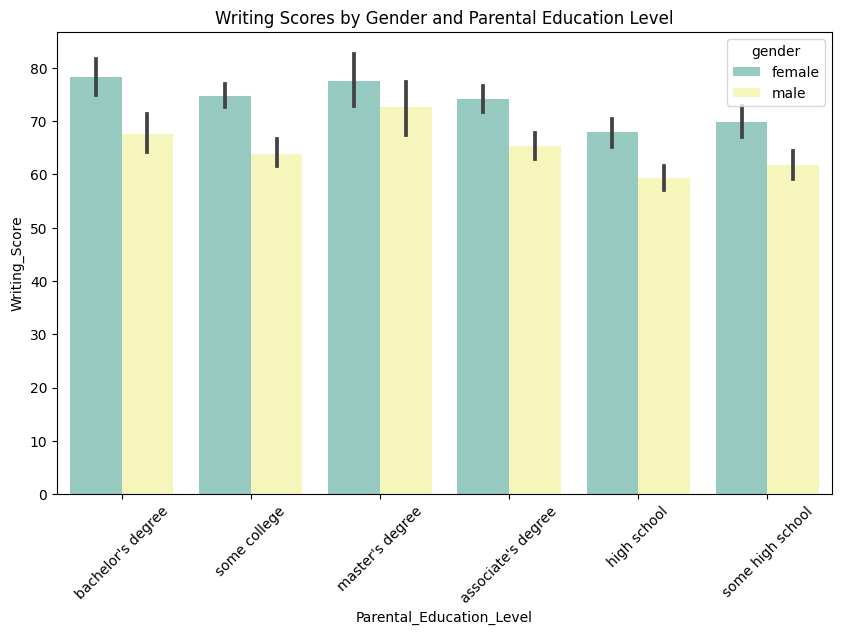

In [22]:
# Bivariate Analysis: Bar plots comparing reading, writing, and math scores with gender and parental education level

# Bar plot for Math Scores by Gender and Parental Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Parental_Education_Level', y='Math_Score', hue='gender', data=gender_parental_education_df_cleaned, palette='Set2')
plt.title('Math Scores by Gender and Parental Education Level')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Reading Scores by Gender and Parental Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Parental_Education_Level', y='Reading_Score', hue='gender', data=gender_parental_education_df_cleaned, palette='Set1')
plt.title('Reading Scores by Gender and Parental Education Level')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Writing Scores by Gender and Parental Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Parental_Education_Level', y='Writing_Score', hue='gender', data=gender_parental_education_df_cleaned, palette='Set3')
plt.title('Writing Scores by Gender and Parental Education Level')
plt.xticks(rotation=45)
plt.show()



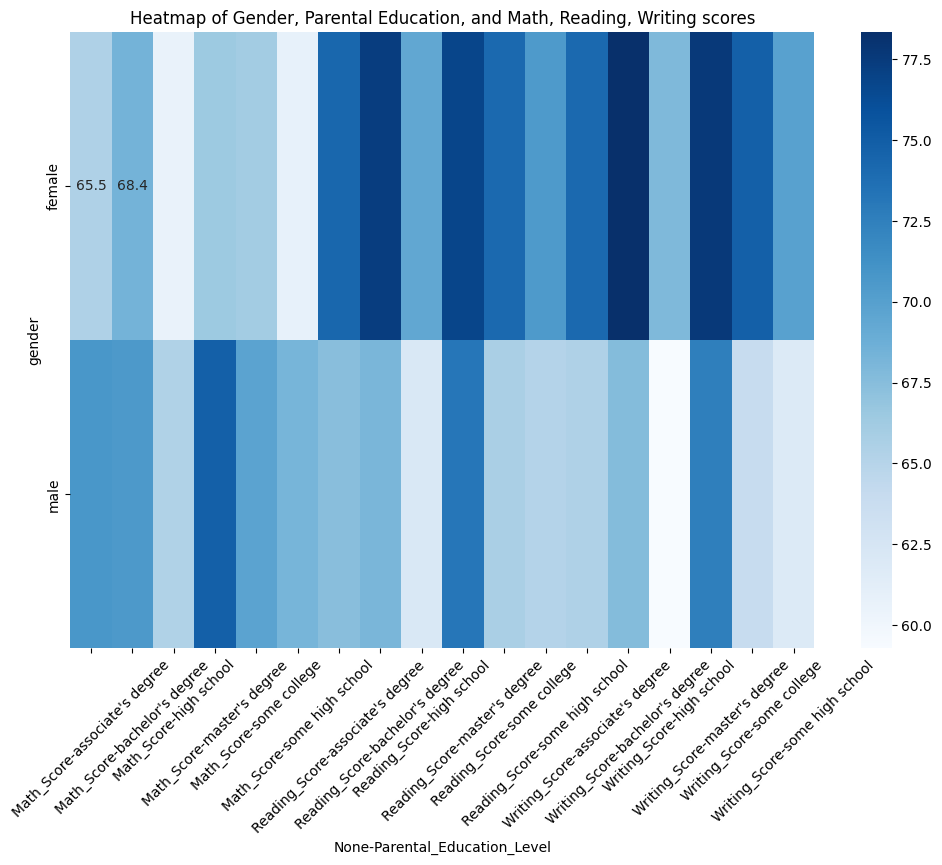

In [23]:
# Multivariate Analysis: Heatmap and PCA
# Create a pivot table with mean scores by gender and parental education level
pivot_table = gender_parental_education_df_cleaned.pivot_table(
    index='gender', 
    columns='Parental_Education_Level',
    values=['Math_Score', 'Reading_Score', 'Writing_Score'], 
    aggfunc='mean'
)

# Generate the heatmap for the combined scores
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.1f')
plt.title('Heatmap of Gender, Parental Education, and Math, Reading, Writing scores')
plt.xticks(rotation=45)
plt.show()



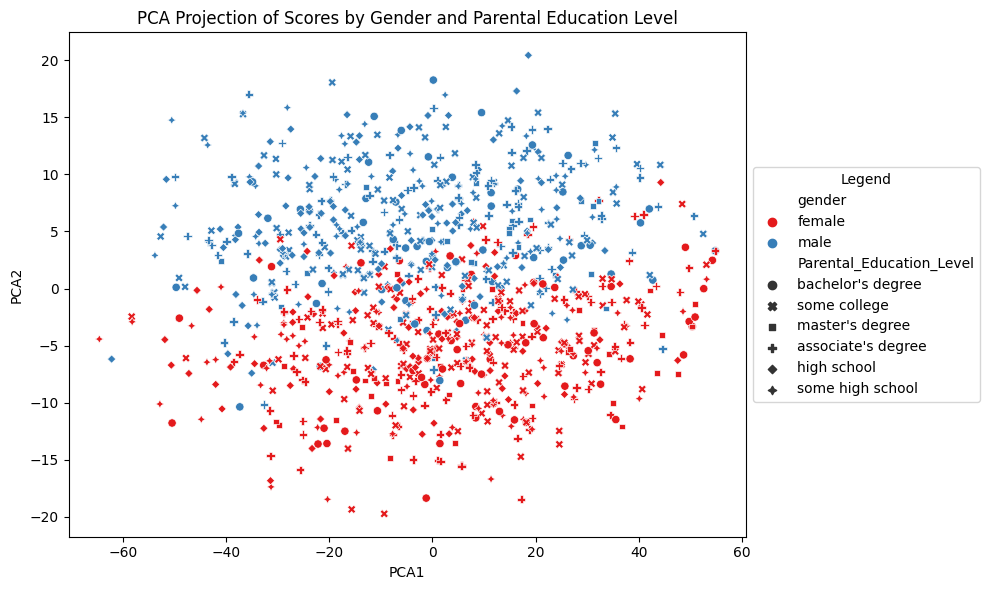

In [24]:
# PCA with Gender and Parental Education Level considered

score_columns = ['Math_Score', 'Reading_Score', 'Writing_Score']
pca = PCA(n_components=2)
pca_result = pca.fit_transform(gender_parental_education_df_cleaned[score_columns])

# Add PCA components to dataframe
gender_parental_education_df_cleaned['PCA1'] = pca_result[:, 0]
gender_parental_education_df_cleaned['PCA2'] = pca_result[:, 1]

# Scatterplot of PCA components colored by gender and styled by parental education level with legend outside
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='PCA1', y='PCA2', hue='gender', style='Parental_Education_Level', data=gender_parental_education_df_cleaned, palette='Set1', markers=True)

# Place the legend outside the plot
scatter_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.title('PCA Projection of Scores by Gender and Parental Education Level')
plt.tight_layout()
plt.show()


Question 2:  How do lunch type and test preparation course completion together influence performance in math, reading, and writing?

In [21]:
lunch_testprep_df_cleaned.describe()



Math_Score  Reading_Score  Writing_Score  Average_Score
count  980.000000     980.000000     980.000000     980.000000
mean    66.650000      69.676531      68.607143      68.311224
std     14.334147      13.912702      14.431542      13.455259
min     27.000000      31.000000      32.000000      31.000000
25%     57.000000      60.000000      58.000000      58.666667
50%     66.000000      70.000000      69.000000      68.666667
75%     77.000000      80.000000      79.000000      78.000000
max    100.000000     100.000000     100.000000     100.000000

<Figure size 1600x1000 with 0 Axes>

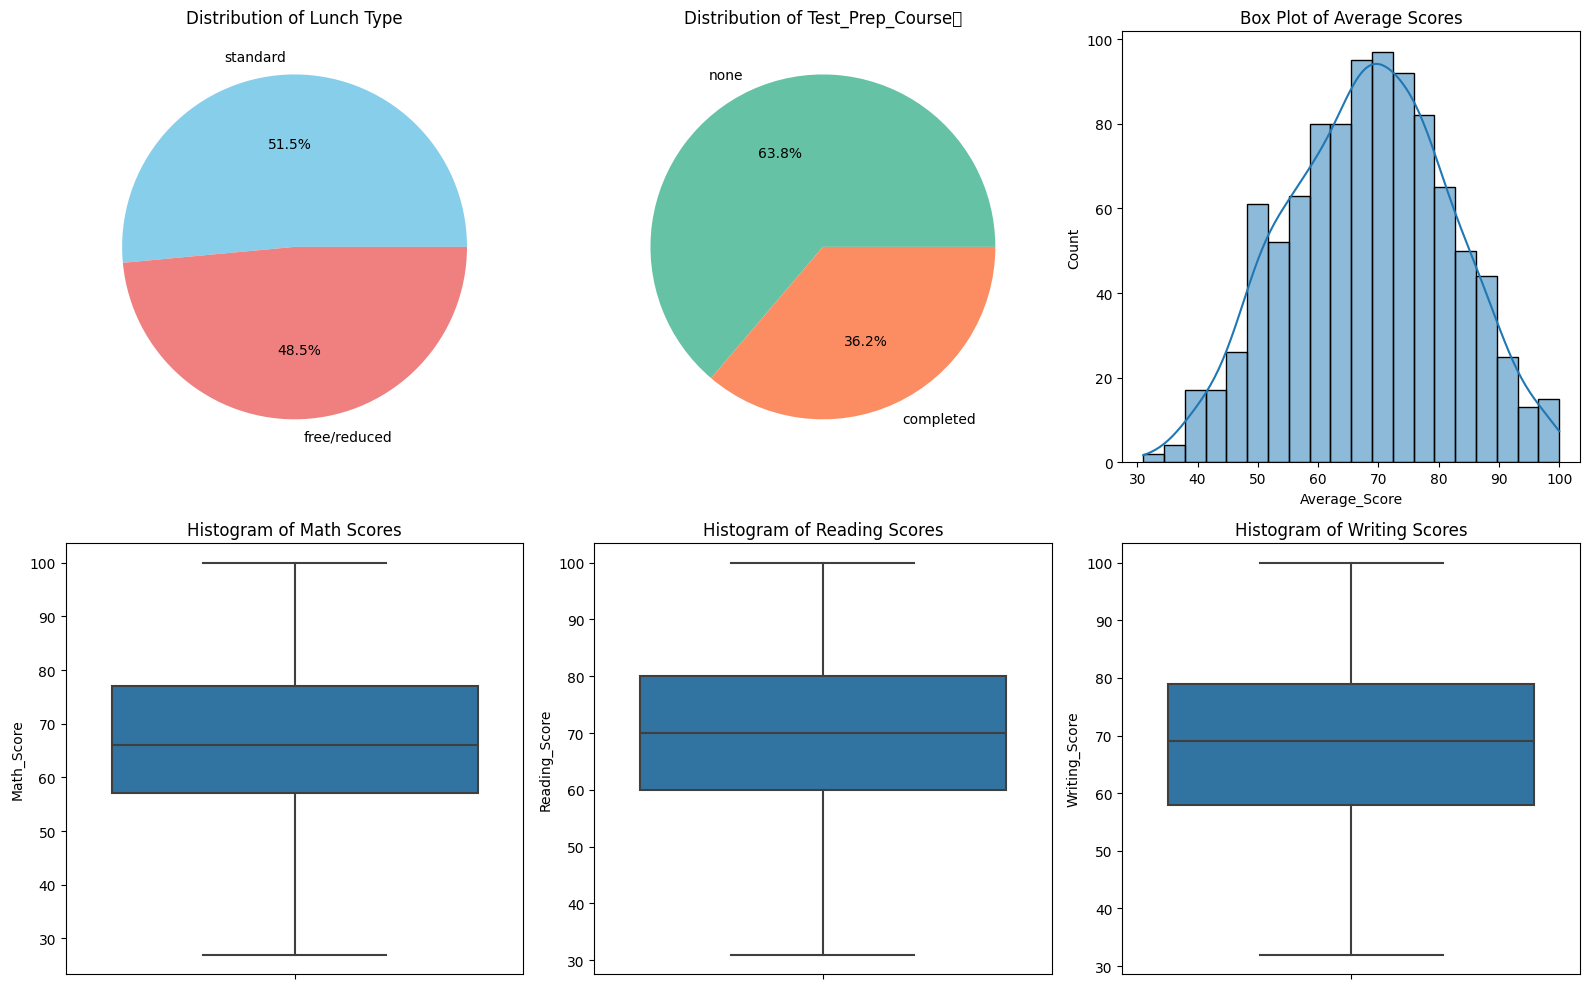

In [25]:


# perform your EDA
## Univariate Analysis

# Correcting the Density Plot for Univariate Analysis
# Since there is an issue with fill=True, we will set it to False to avoid the error.

# Let's correct the plots and ensure all requested plots are properly generated with accuracy, including for gender.
# We will proceed with univariate, bivariate, and multivariate analyses as requested.

plt.figure(figsize=(16, 10))
# Creating 4 univariate analysis plots in one figure

plt.figure(figsize=(16, 10))

# Pie chart for Gender Distribution
plt.subplot(2, 3, 1)
lunch_type = lunch_testprep_df_cleaned['lunch'].value_counts()
plt.pie(gender_counts, labels=lunch_type .index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Lunch Type')

# Pie chart for Parental Education Level Distribution
plt.subplot(2, 3, 2)
Test_Prep_Course_counts = lunch_testprep_df_cleaned['Test_Prep_Course'].value_counts()
plt.pie(Test_Prep_Course_counts, labels=Test_Prep_Course_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Test_Prep_Course	')

# Histogram for Average Score
plt.subplot(2, 3, 3)

sns.histplot(lunch_testprep_df_cleaned['Average_Score'], kde=True, bins=20)
plt.title('Box Plot of Average Scores')

# Box Plot for Average Score
plt.subplot(2, 3, 4)
sns.boxplot(y=lunch_testprep_df_cleaned['Math_Score'])
plt.title('Histogram of Math Scores')

plt.subplot(2, 3, 5)
sns.boxplot(y=lunch_testprep_df_cleaned['Reading_Score'])
plt.title('Histogram of Reading Scores')

plt.subplot(2, 3, 6)
sns.boxplot(y=lunch_testprep_df_cleaned['Writing_Score'])
plt.title('Histogram of Writing Scores')

plt.tight_layout()
plt.show()


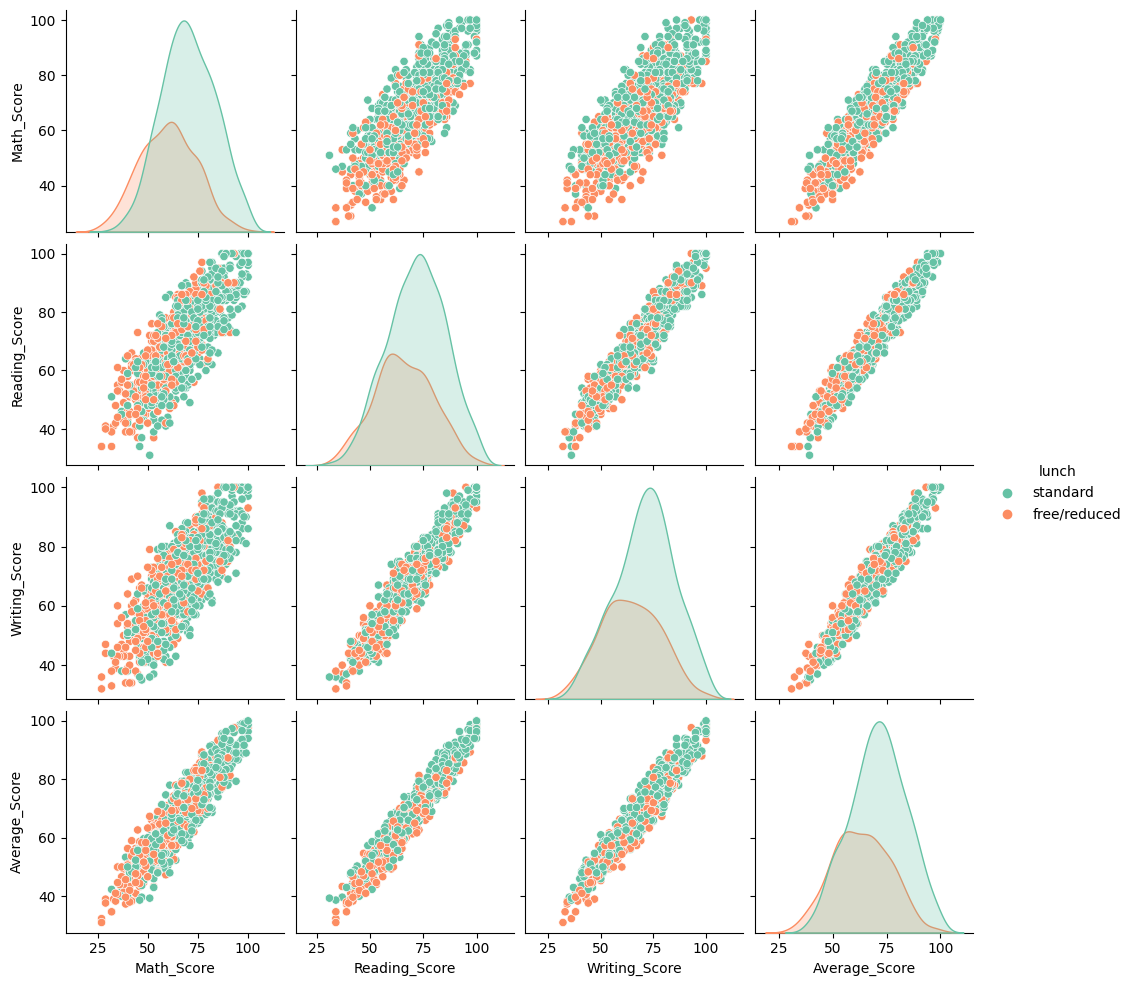

In [26]:
## Bivariate Analysis
# Pairplot for gender, parental education, and scores
sns.pairplot(lunch_testprep_df_cleaned, hue='lunch', vars=['Math_Score', 'Reading_Score', 'Writing_Score', 'Average_Score'], palette='Set2')
plt.show()

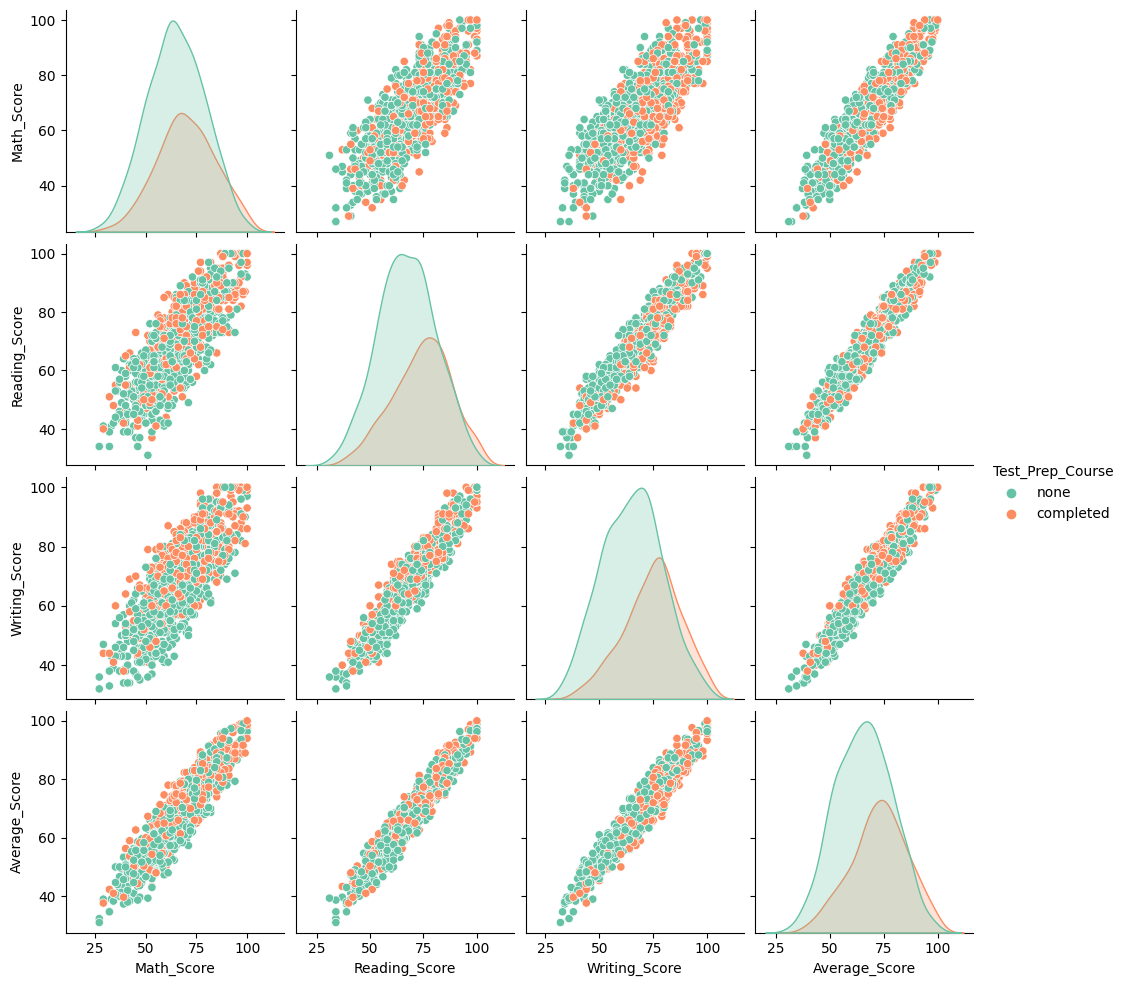

In [27]:
## Bivariate Analysis
# Pairplot for gender, parental education, and scores
sns.pairplot(lunch_testprep_df_cleaned, hue='Test_Prep_Course', vars=['Math_Score', 'Reading_Score', 'Writing_Score', 'Average_Score'], palette='Set2')
plt.show()


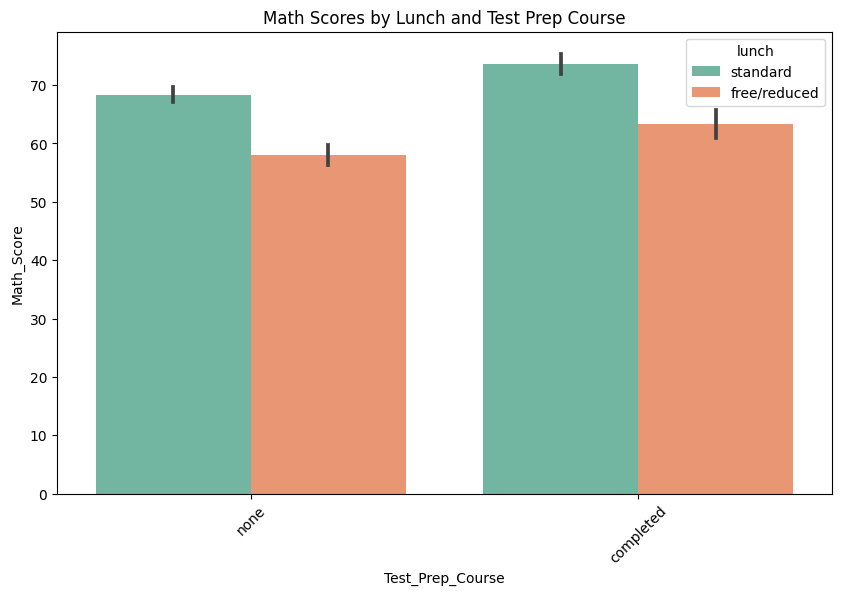

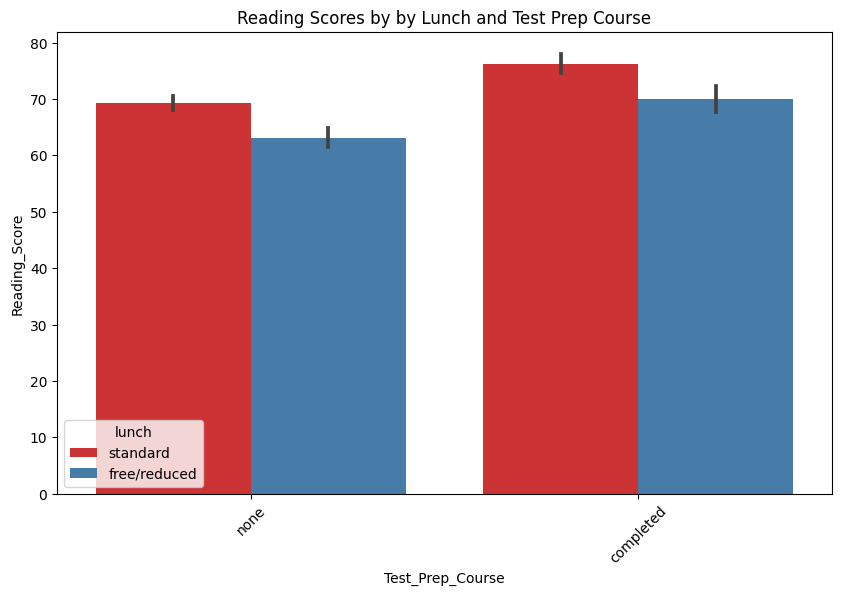

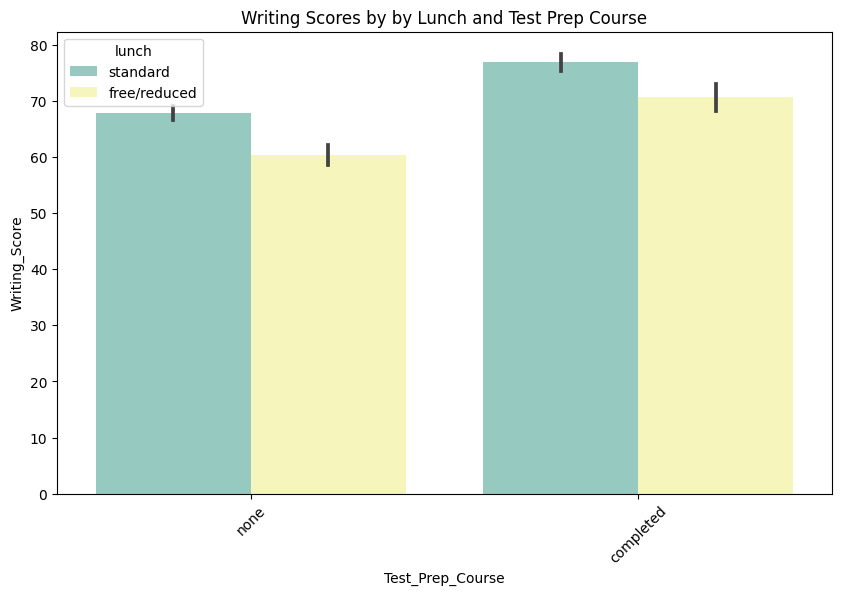

In [28]:
# Bivariate Analysis: Bar plots comparing reading, writing, and math scores with gender and parental education level

# Bar plot for Math Scores by Gender and Parental Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Test_Prep_Course', y='Math_Score', hue='lunch', data=lunch_testprep_df_cleaned, palette='Set2')
plt.title('Math Scores by Lunch and Test Prep Course')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Reading Scores by Gender and Parental Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Test_Prep_Course', y='Reading_Score', hue='lunch', data=lunch_testprep_df_cleaned, palette='Set1')
plt.title('Reading Scores by by Lunch and Test Prep Course')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Writing Scores by Gender and Parental Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Test_Prep_Course', y='Writing_Score', hue='lunch', data=lunch_testprep_df_cleaned, palette='Set3')
plt.title('Writing Scores by by Lunch and Test Prep Course')
plt.xticks(rotation=45)
plt.show()



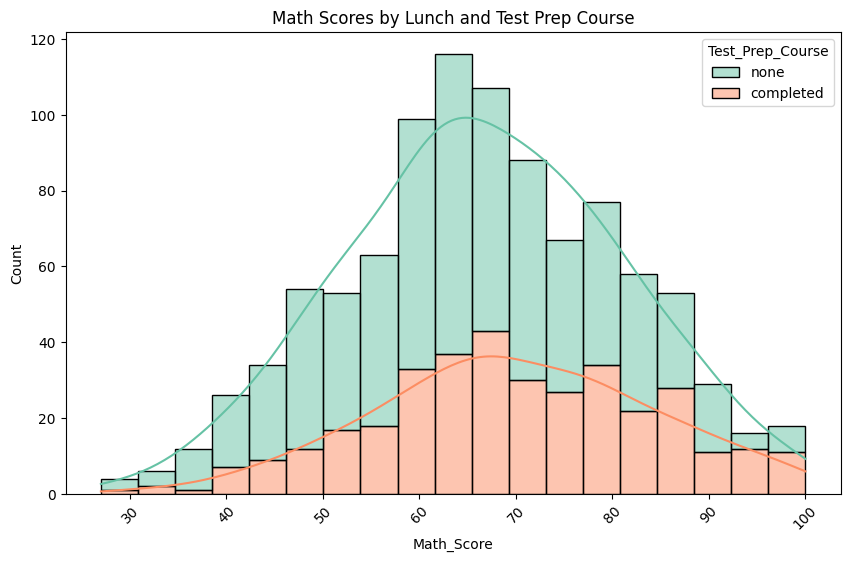

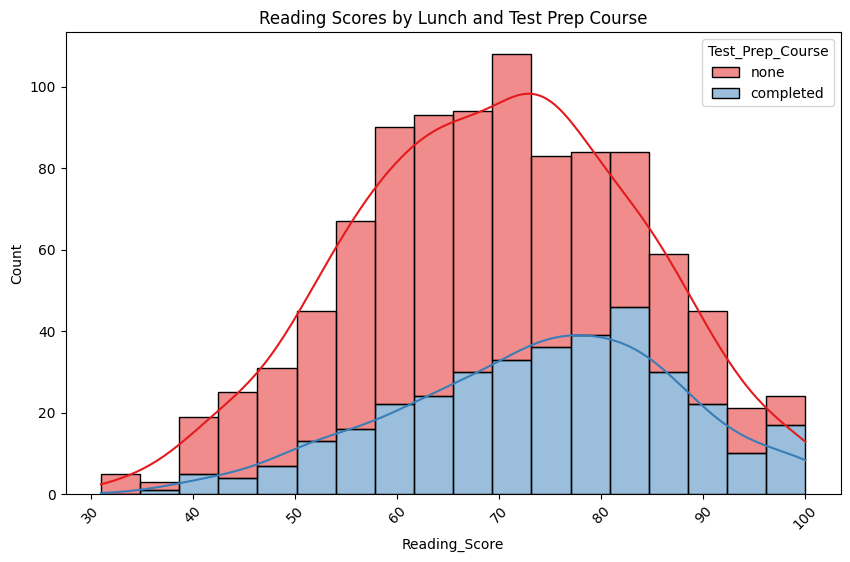

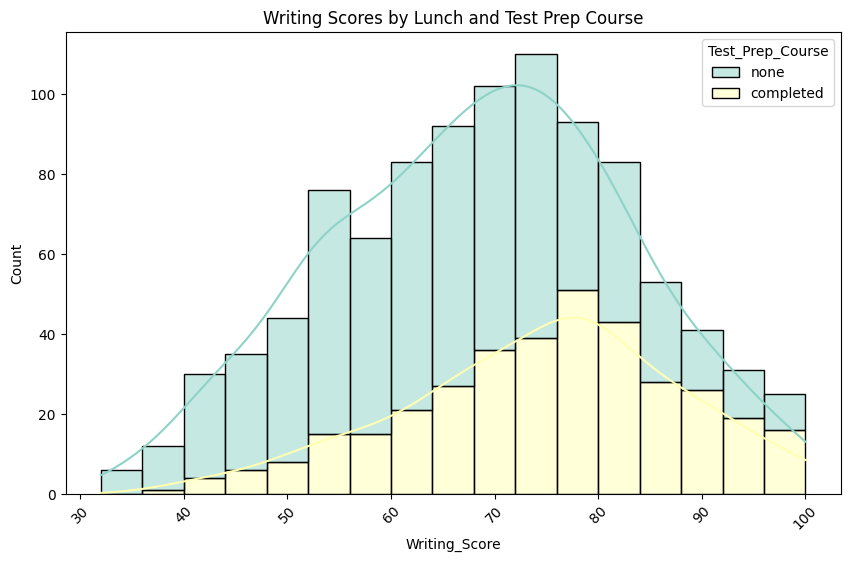

In [29]:
# Bivariate Analysis: Histograms comparing reading, writing, and math scores with lunch type and test preparation course

# Histogram for Math Scores by Lunch and Test Prep Course
plt.figure(figsize=(10, 6))
sns.histplot(data=lunch_testprep_df_cleaned, x='Math_Score', hue='Test_Prep_Course', multiple='stack', kde=True, palette='Set2')
plt.title('Math Scores by Lunch and Test Prep Course')
plt.xticks(rotation=45)
plt.show()

# Histogram for Reading Scores by Lunch and Test Prep Course
plt.figure(figsize=(10, 6))
sns.histplot(data=lunch_testprep_df_cleaned, x='Reading_Score',  hue='Test_Prep_Course', multiple='stack', kde=True, palette='Set1')
plt.title('Reading Scores by Lunch and Test Prep Course')
plt.xticks(rotation=45)
plt.show()

# Histogram for Writing Scores by Lunch and Test Prep Course
plt.figure(figsize=(10, 6))
sns.histplot(data=lunch_testprep_df_cleaned, x='Writing_Score',  hue='Test_Prep_Course', multiple='stack', kde=True, palette='Set3')
plt.title('Writing Scores by Lunch and Test Prep Course')
plt.xticks(rotation=45)
plt.show()


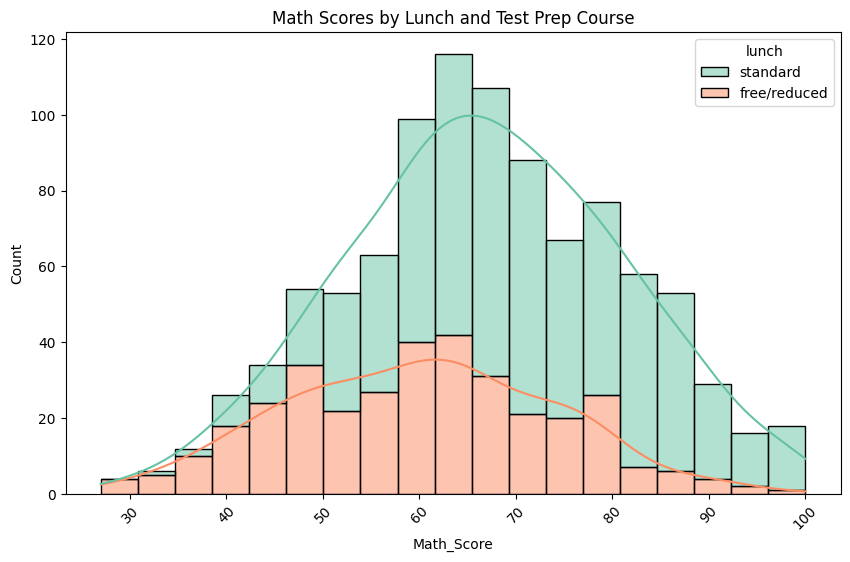

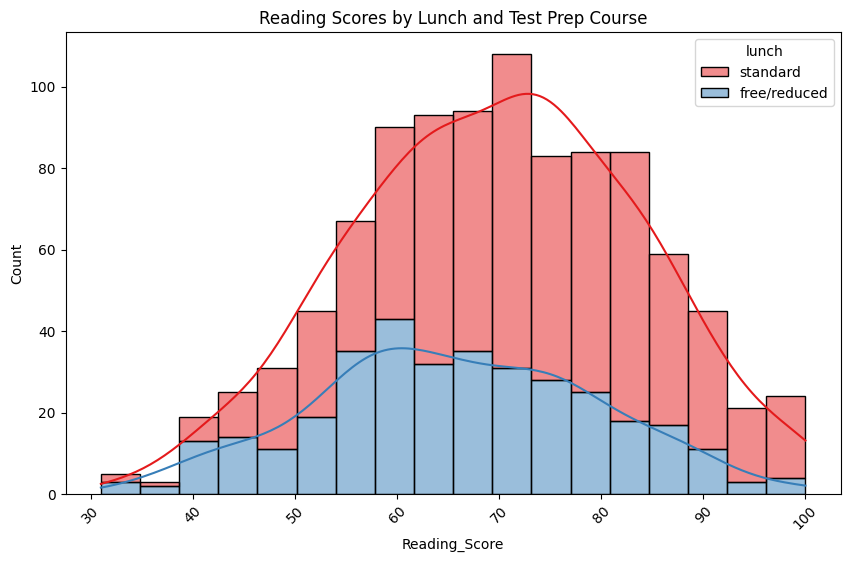

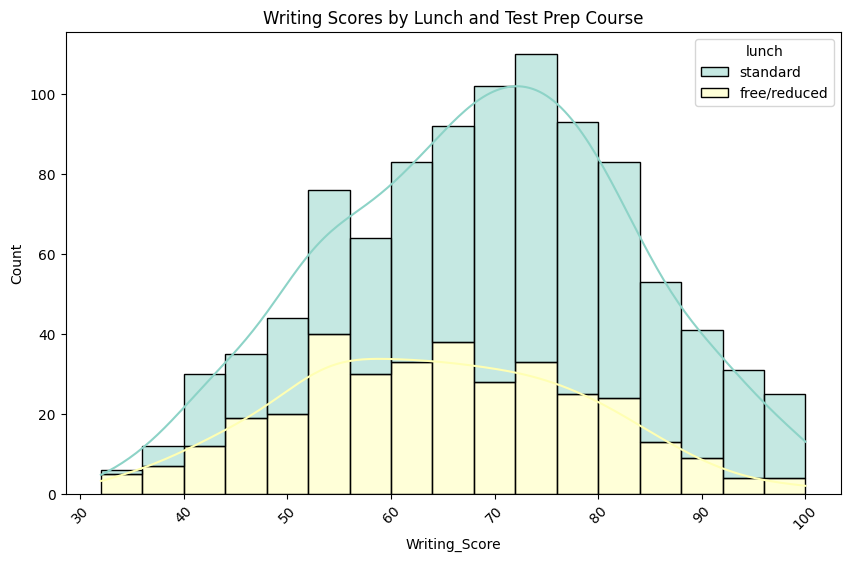

In [30]:
# Bivariate Analysis: Histograms comparing reading, writing, and math scores with lunch type and test preparation course

# Histogram for Math Scores by Lunch and Test Prep Course
plt.figure(figsize=(10, 6))
sns.histplot(data=lunch_testprep_df_cleaned, x='Math_Score', hue='lunch', multiple='stack', kde=True, palette='Set2')
plt.title('Math Scores by Lunch and Test Prep Course')
plt.xticks(rotation=45)
plt.show()

# Histogram for Reading Scores by Lunch and Test Prep Course
plt.figure(figsize=(10, 6))
sns.histplot(data=lunch_testprep_df_cleaned, x='Reading_Score',  hue='lunch', multiple='stack', kde=True, palette='Set1')
plt.title('Reading Scores by Lunch and Test Prep Course')
plt.xticks(rotation=45)
plt.show()

# Histogram for Writing Scores by Lunch and Test Prep Course
plt.figure(figsize=(10, 6))
sns.histplot(data=lunch_testprep_df_cleaned, x='Writing_Score',  hue='lunch', multiple='stack', kde=True, palette='Set3')
plt.title('Writing Scores by Lunch and Test Prep Course')
plt.xticks(rotation=45)
plt.show()


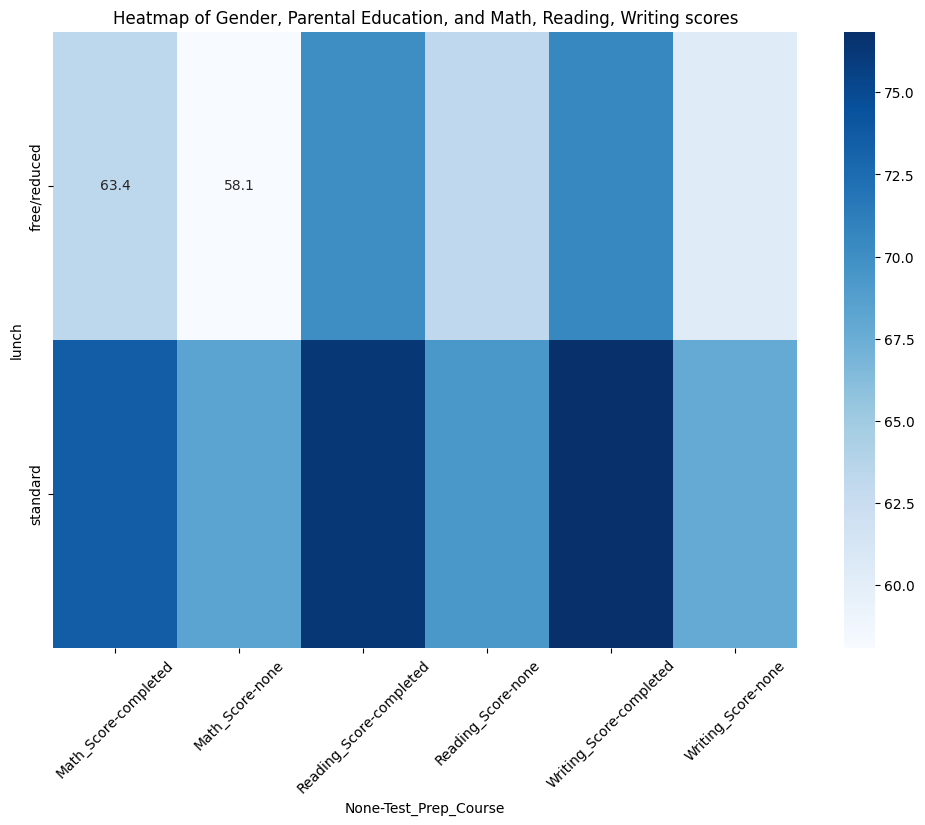

In [31]:
# Multivariate Analysis: Heatmap and PCA
# Create a pivot table with mean scores by gender and parental education level
pivot_table = lunch_testprep_df_cleaned.pivot_table(
    index='lunch', 
    columns='Test_Prep_Course',
    values=['Math_Score', 'Reading_Score', 'Writing_Score'], 
    aggfunc='mean'
)

# Generate the heatmap for the combined scores
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.1f')
plt.title('Heatmap of Gender, Parental Education, and Math, Reading, Writing scores')
plt.xticks(rotation=45)
plt.show()



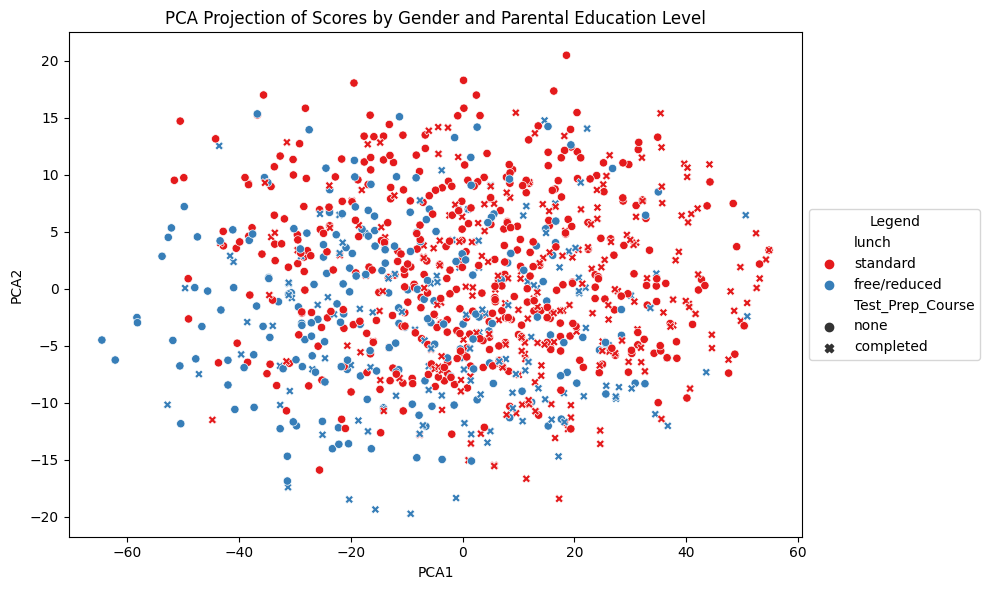

In [32]:
# PCA with Gender and Parental Education Level considered

score_columns = ['Math_Score', 'Reading_Score', 'Writing_Score']
pca = PCA(n_components=2)
pca_result = pca.fit_transform(lunch_testprep_df_cleaned[score_columns])

# Add PCA components to dataframe
lunch_testprep_df_cleaned['PCA1'] = pca_result[:, 0]
lunch_testprep_df_cleaned['PCA2'] = pca_result[:, 1]

# Scatterplot of PCA components colored by gender and styled by parental education level with legend outside
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='PCA1', y='PCA2', hue='lunch', style='Test_Prep_Course', data=lunch_testprep_df_cleaned, palette='Set1', markers=True)

# Place the legend outside the plot
scatter_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.title('PCA Projection of Scores by Gender and Parental Education Level')
plt.tight_layout()
plt.show()

Question 3: How do top performers (90th percentile and above) differ from low performers (below 25th percentile) based on gender, parental education, lunch type, and race/ethnicity?


In [22]:
performance_factors_df_cleaned.describe()


Math_Score  Reading_Score  Writing_Score  Average_Score
count  986.000000     986.000000     986.000000     986.000000
mean    66.694726      69.723124      68.648073      68.355308
std     14.340780      13.910716      14.427092      13.459114
min     27.000000      31.000000      32.000000      31.000000
25%     57.000000      60.000000      58.000000      58.666667
50%     66.500000      70.000000      69.000000      68.666667
75%     77.000000      80.000000      79.000000      78.000000
max    100.000000     100.000000     100.000000     100.000000

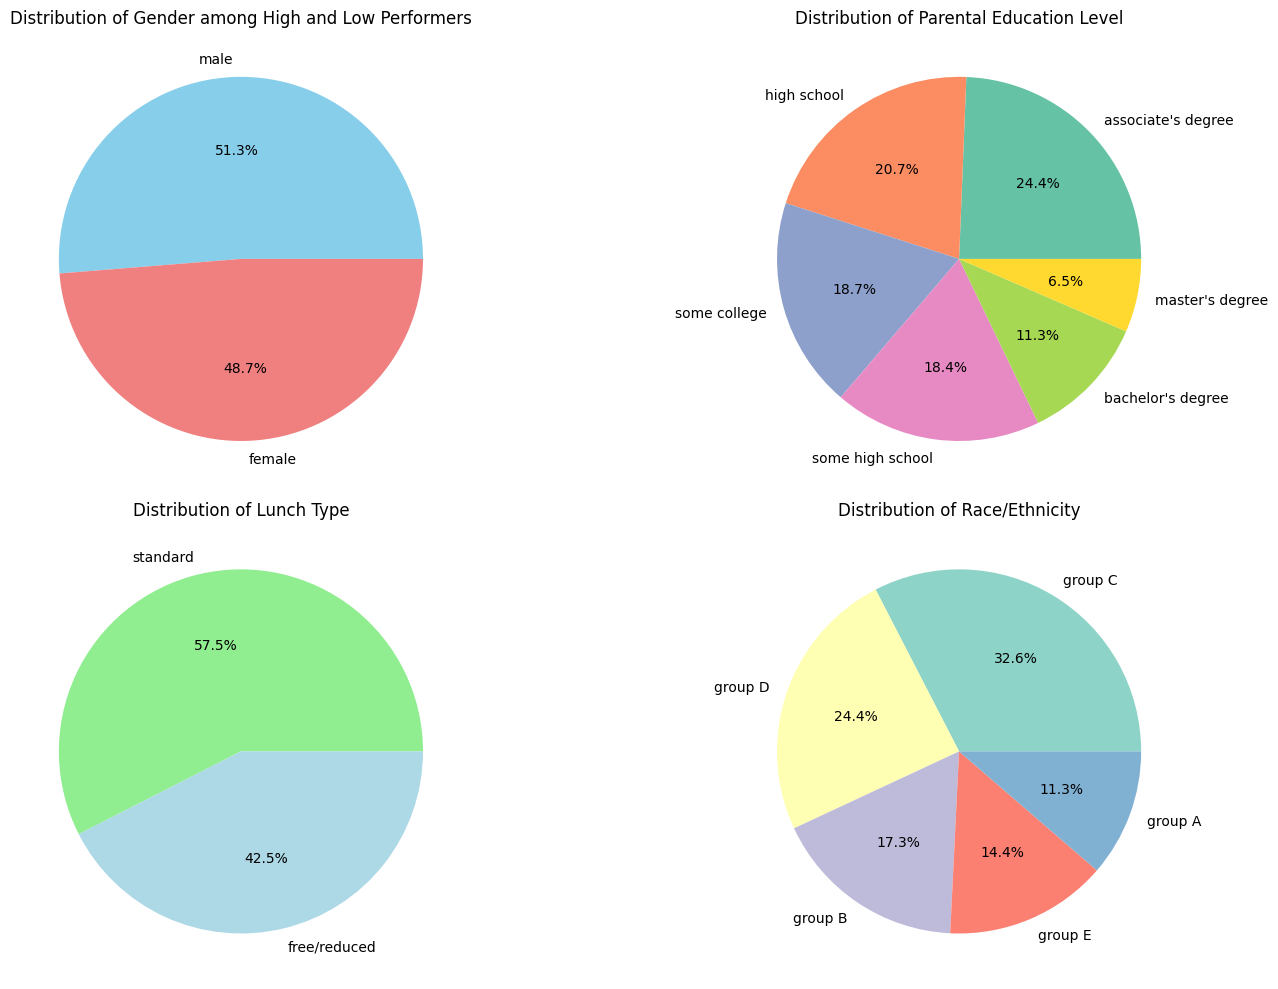

In [33]:
# Creating an Average_Score column for performance analysis
performance_factors_df_cleaned['Average_Score'] = (performance_factors_df_cleaned['Math_Score'] + 
                                                   performance_factors_df_cleaned['Reading_Score'] + 
                                                   performance_factors_df_cleaned['Writing_Score']) / 3

# Define the 90th percentile as high performers and below 25th percentile as low performers
high_performer_threshold = performance_factors_df_cleaned['Average_Score'].quantile(0.90)
low_performer_threshold = performance_factors_df_cleaned['Average_Score'].quantile(0.25)

# Filter high performers (90th percentile and above) and low performers (below 25th percentile)
high_performers = performance_factors_df_cleaned[performance_factors_df_cleaned['Average_Score'] >= high_performer_threshold]
low_performers = performance_factors_df_cleaned[performance_factors_df_cleaned['Average_Score'] <= low_performer_threshold]

# Create a new column in both DataFrames to label high and low performers
high_performers['Performance_Level'] = 'High Performer'
low_performers['Performance_Level'] = 'Low Performer'

# Concatenate the two DataFrames
combined_df = pd.concat([high_performers, low_performers])

# Proceeding with univariate, bivariate, and multivariate analysis for gender, parental education, lunch type, and race/ethnicity.

# Univariate Analysis
plt.figure(figsize=(16, 10))

# Pie chart for Gender Distribution among High and Low Performers
plt.subplot(2, 2, 1)
gender_counts = combined_df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender among High and Low Performers')

# Pie chart for Parental Education Level Distribution
plt.subplot(2, 2, 2)
parental_education_counts = combined_df['Parental_Education_Level'].value_counts()
plt.pie(parental_education_counts, labels=parental_education_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Parental Education Level')

# Pie chart for Lunch Type Distribution
plt.subplot(2, 2, 3)
lunch_counts = combined_df['lunch'].value_counts()
plt.pie(lunch_counts, labels=lunch_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
plt.title('Distribution of Lunch Type')

# Pie chart for Race/Ethnicity Distribution
plt.subplot(2, 2, 4)
race_counts = combined_df['race/ethnicity'].value_counts()
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Race/Ethnicity')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of  High and Low Performers')

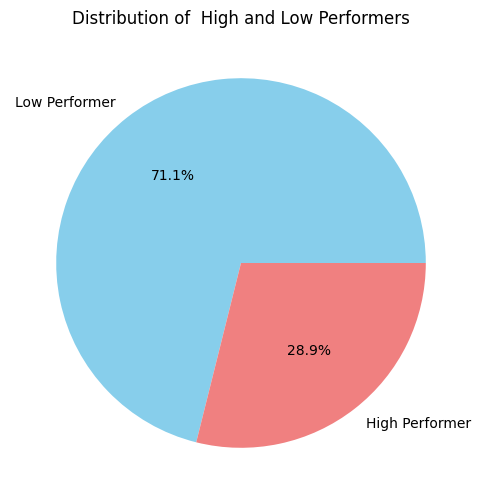

In [34]:
plt.figure(figsize=(6, 6))

# Pie chart for Gender Distribution among High and Low Performers
Performance_counts = combined_df['Performance_Level'].value_counts()
plt.pie(Performance_counts, labels=Performance_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of  High and Low Performers')

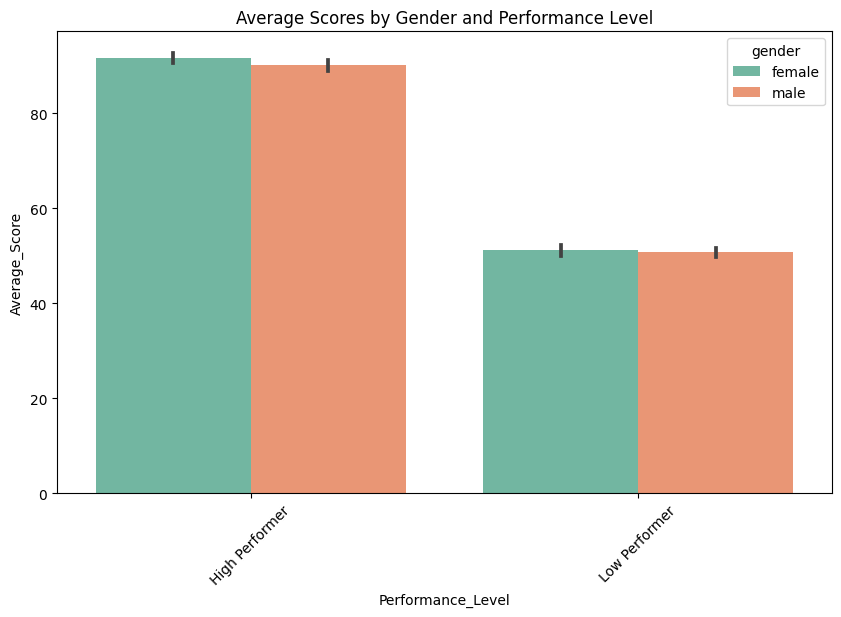

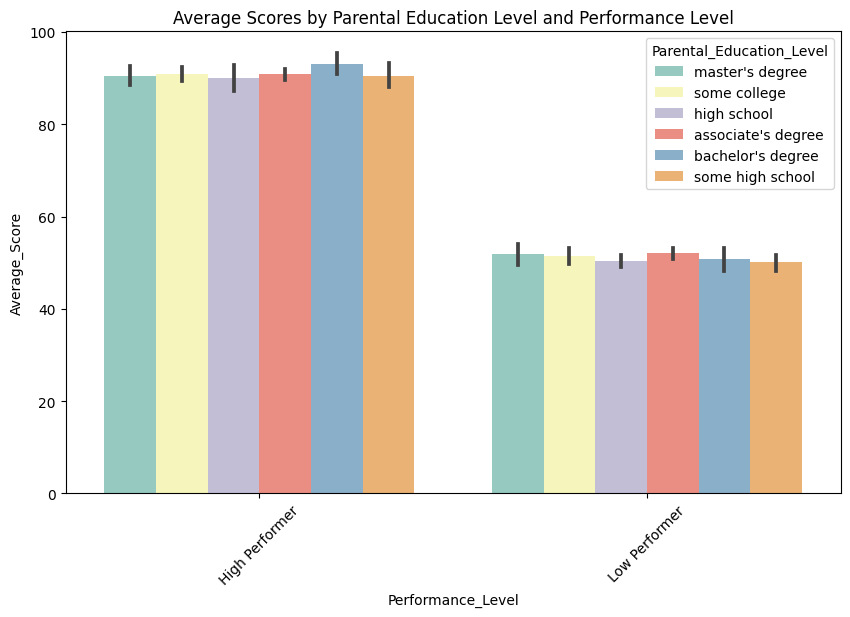

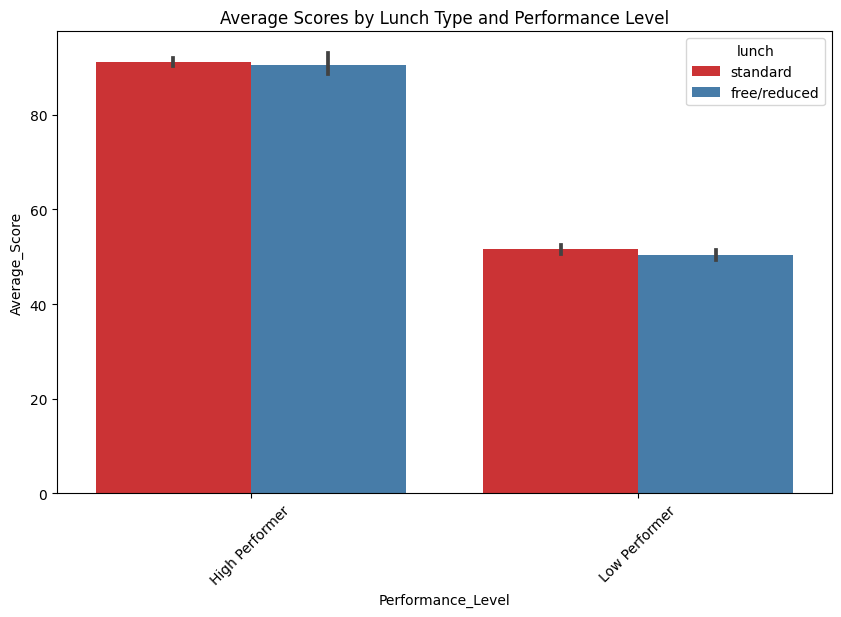

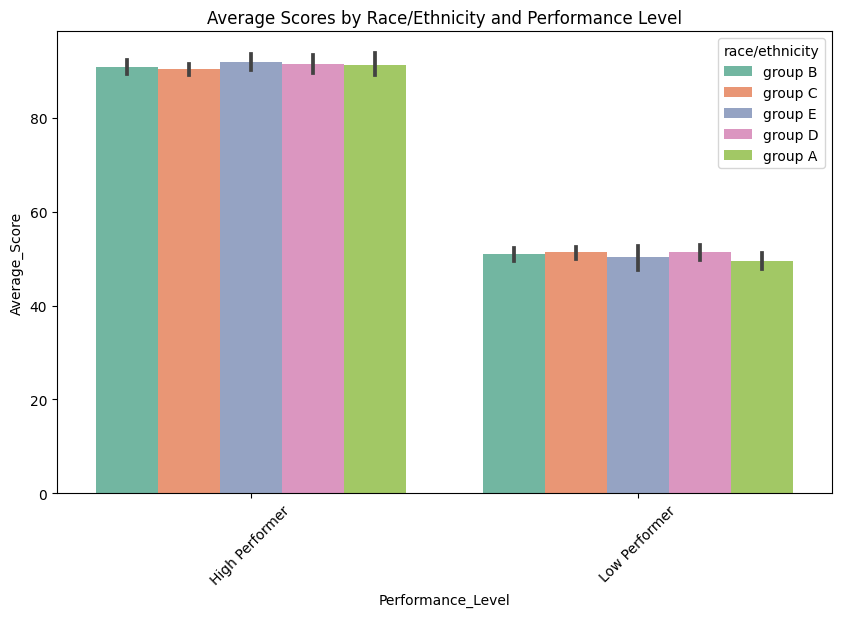

In [35]:
# Bivariate Analysis: Compare High and Low Performers
# Bar plot for Average Scores by Gender and Performance Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Performance_Level', y='Average_Score', hue='gender', data=combined_df, palette='Set2')
plt.title('Average Scores by Gender and Performance Level')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Average Scores by Parental Education Level and Performance Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Performance_Level', y='Average_Score', hue='Parental_Education_Level', data=combined_df, palette='Set3')
plt.title('Average Scores by Parental Education Level and Performance Level')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Average Scores by Lunch Type and Performance Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Performance_Level', y='Average_Score', hue='lunch', data=combined_df, palette='Set1')
plt.title('Average Scores by Lunch Type and Performance Level')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Average Scores by Race/Ethnicity and Performance Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Performance_Level', y='Average_Score', hue='race/ethnicity', data=combined_df, palette='Set2')
plt.title('Average Scores by Race/Ethnicity and Performance Level')
plt.xticks(rotation=45)
plt.show()



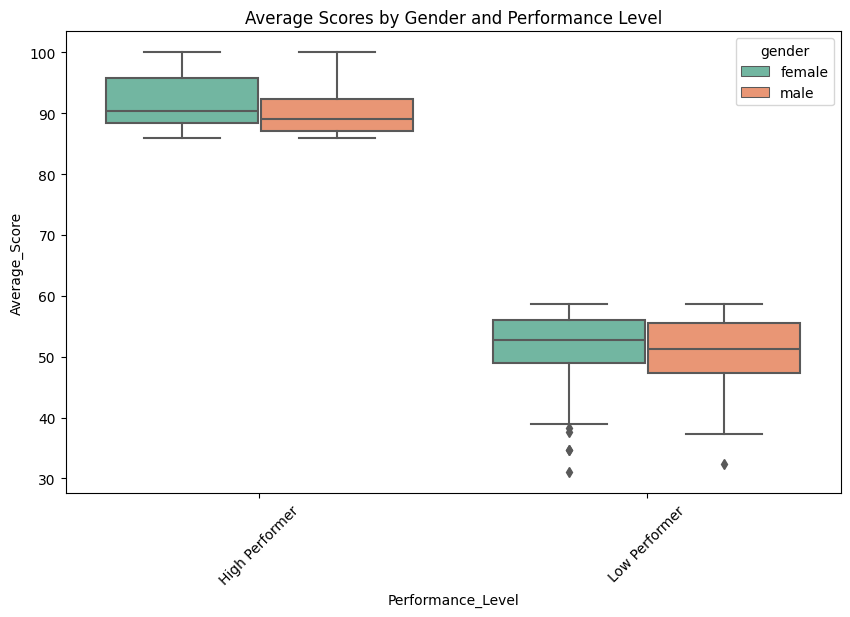

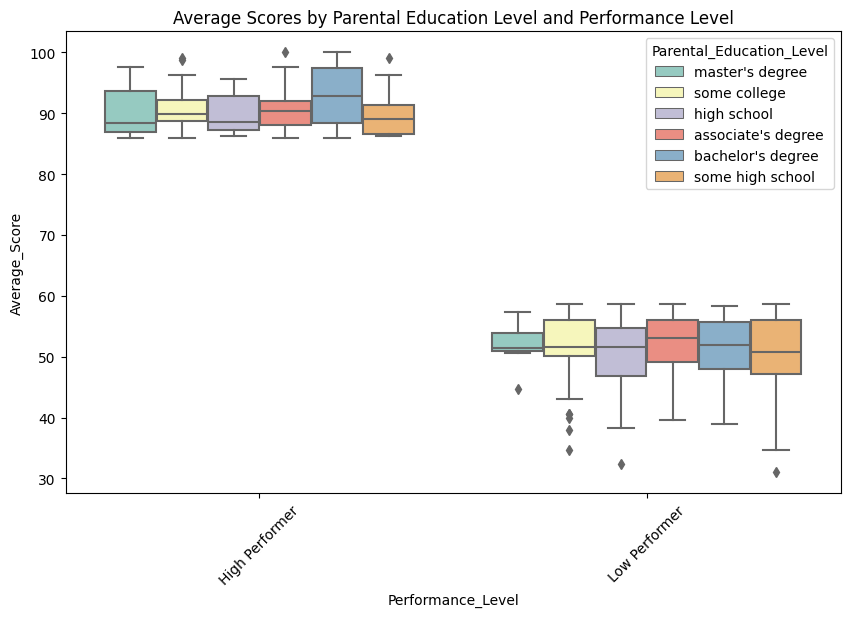

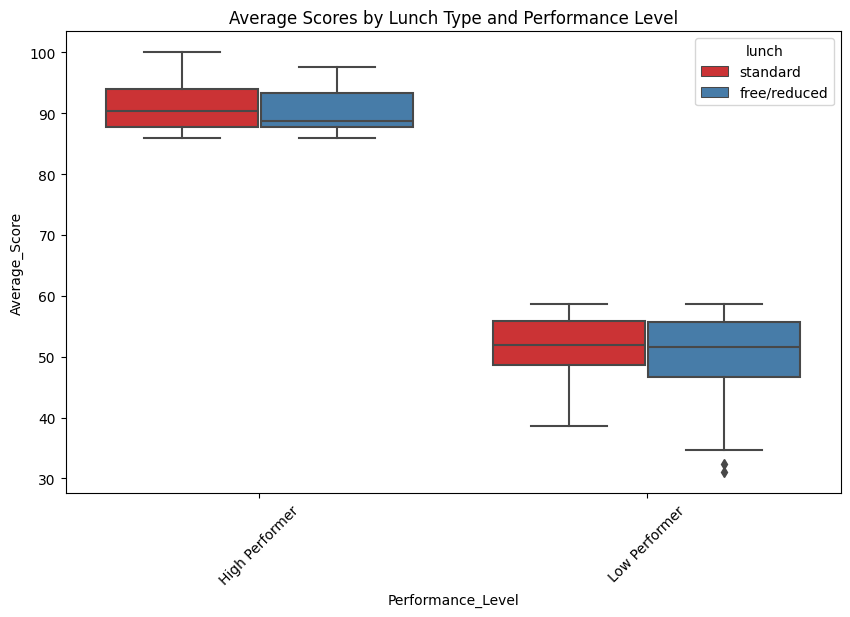

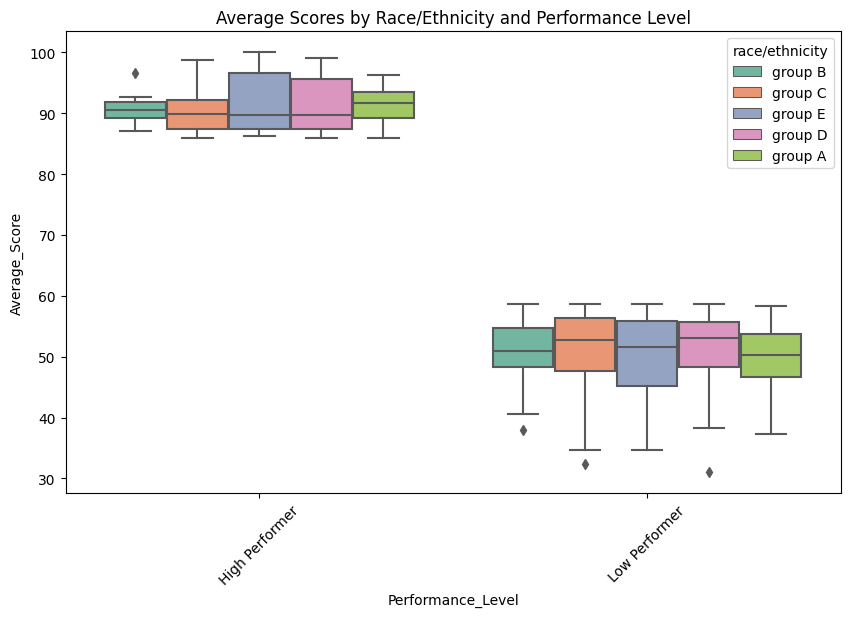

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance_Level', y='Average_Score', hue='gender', data=combined_df, palette='Set2')
plt.title('Average Scores by Gender and Performance Level')
plt.xticks(rotation=45)
plt.show()

# Box plot for Average Scores by Parental Education Level and Performance Level.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance_Level', y='Average_Score', hue='Parental_Education_Level', data=combined_df, palette='Set3')
plt.title('Average Scores by Parental Education Level and Performance Level')
plt.xticks(rotation=45)
plt.show()

# Box plot for Average Scores by Lunch Type and Performance Level.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance_Level', y='Average_Score', hue='lunch', data=combined_df, palette='Set1')
plt.title('Average Scores by Lunch Type and Performance Level')
plt.xticks(rotation=45)
plt.show()

# Box plot for Average Scores by Race/Ethnicity and Performance Level.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance_Level', y='Average_Score', hue='race/ethnicity', data=combined_df, palette='Set2')
plt.title('Average Scores by Race/Ethnicity and Performance Level')
plt.xticks(rotation=45)
plt.show()


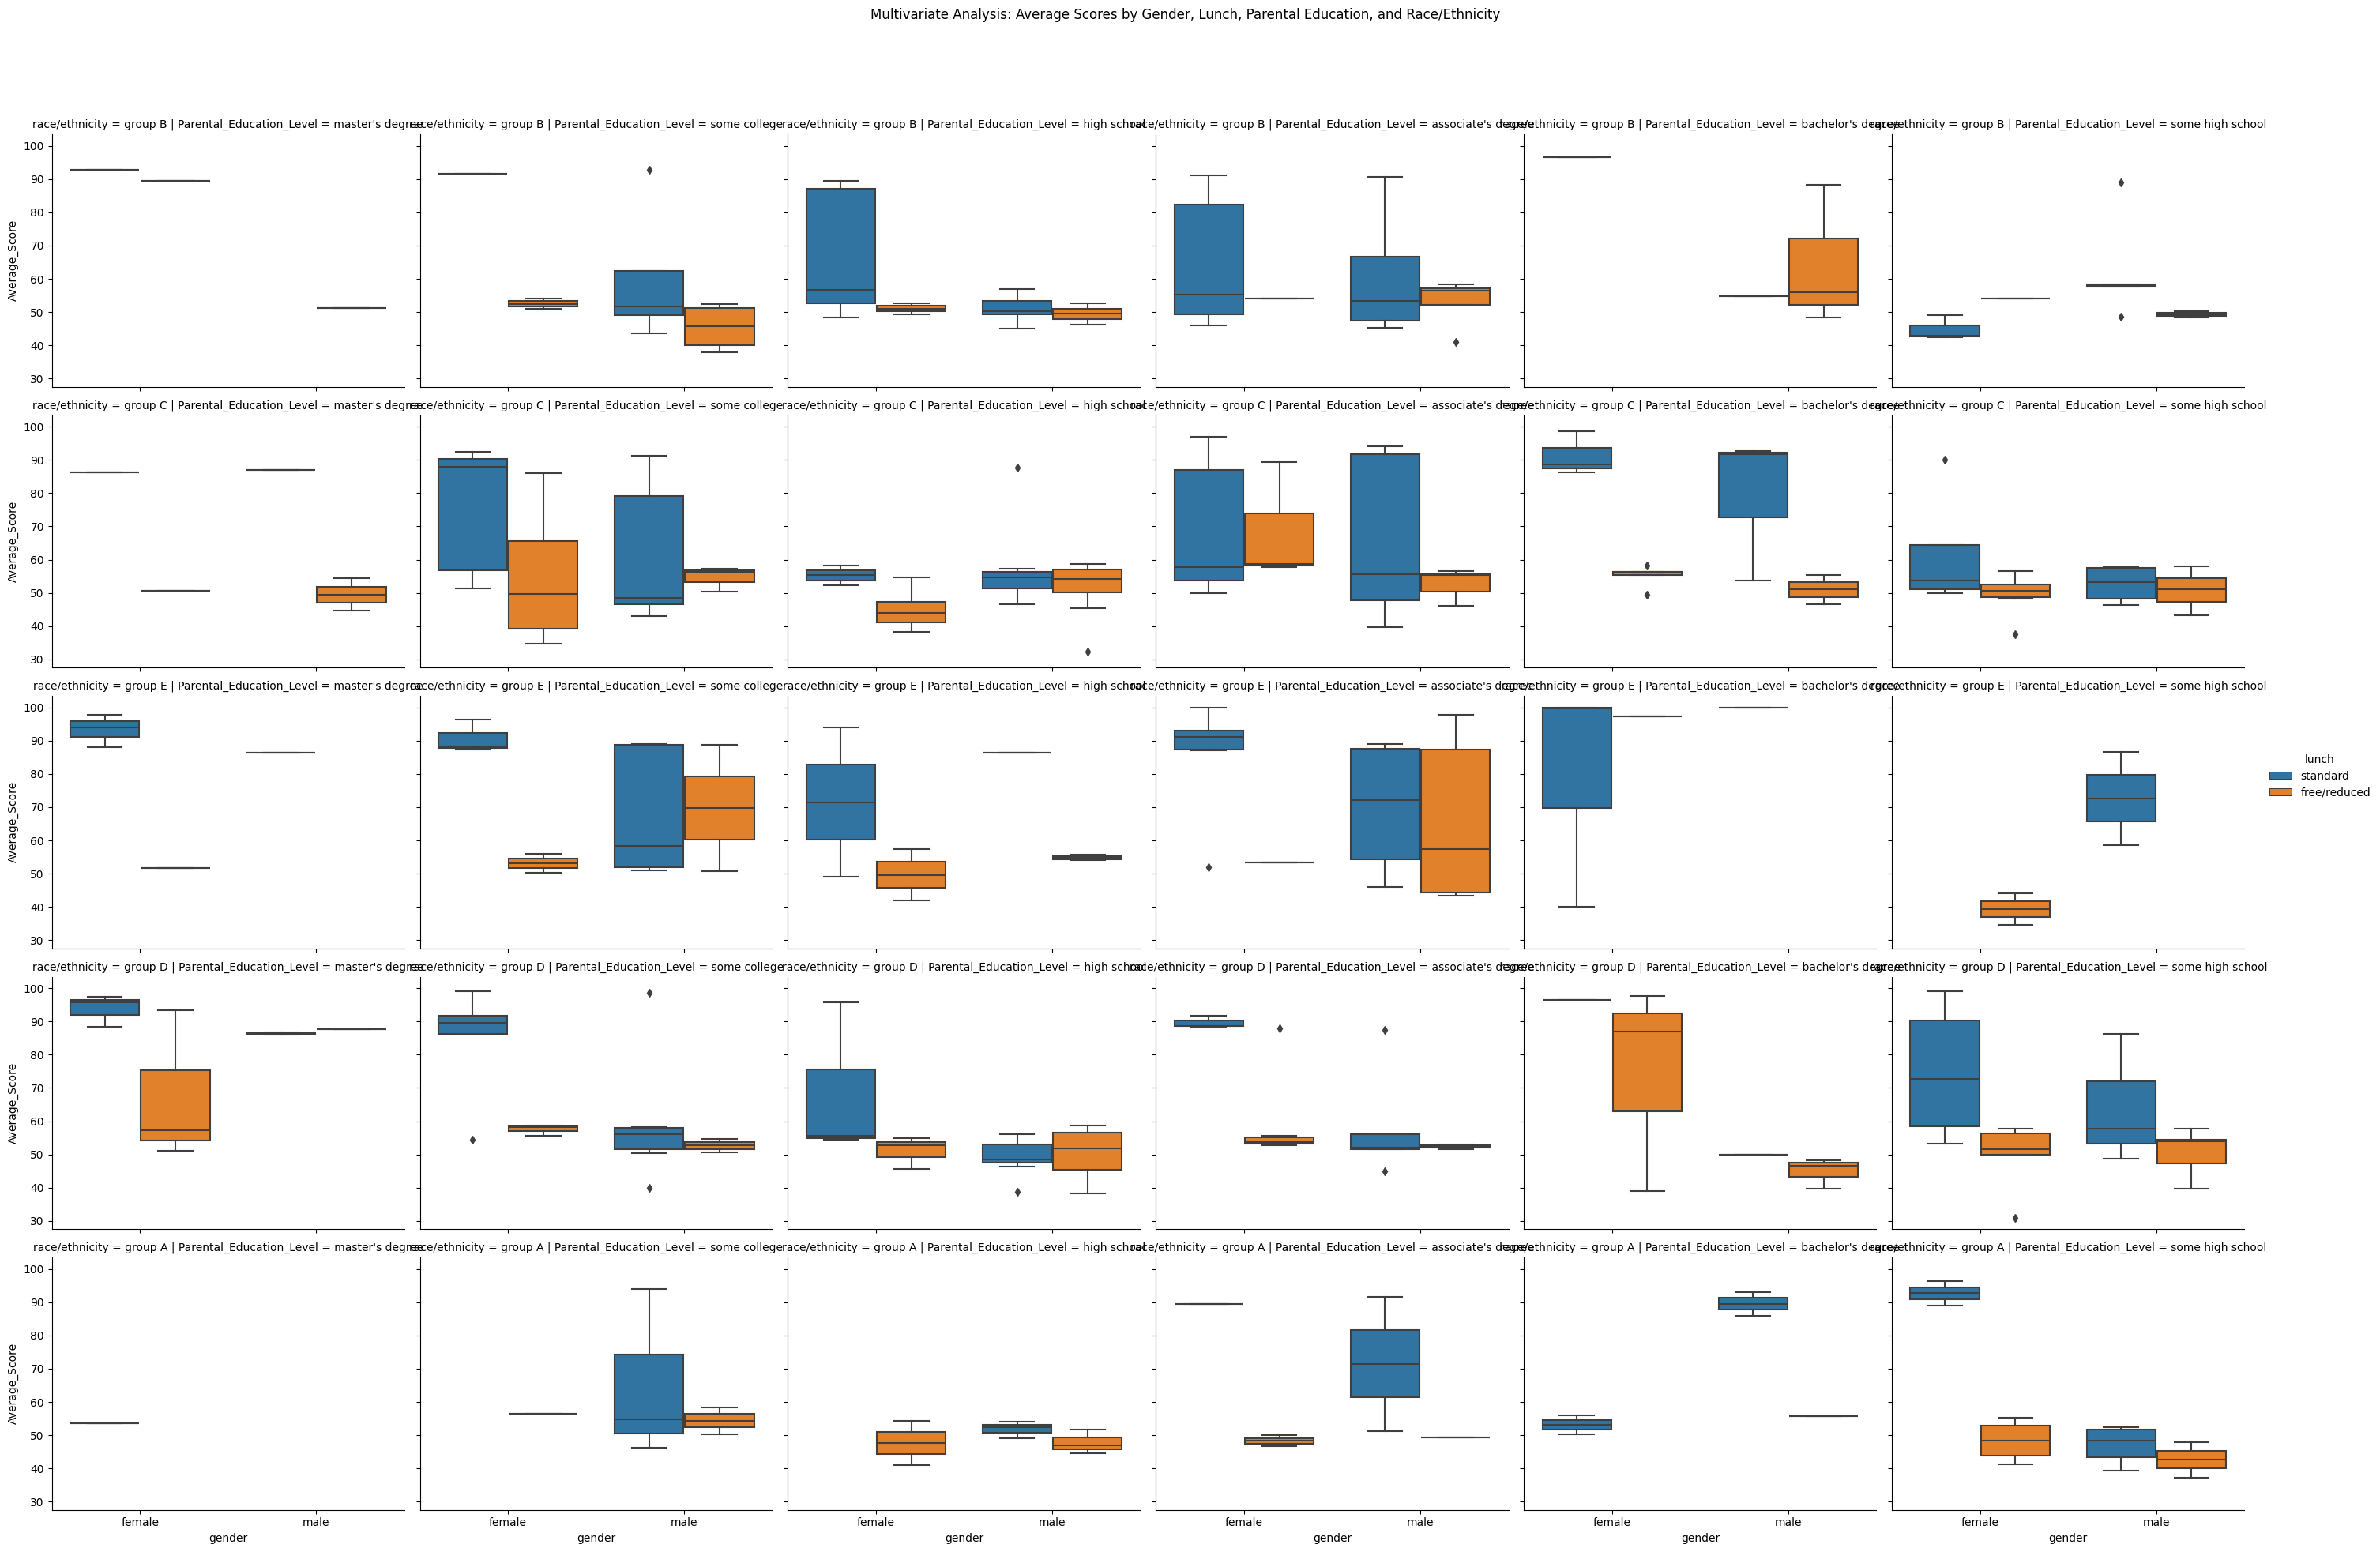

In [37]:
g = sns.catplot(
    x="gender", 
    y="Average_Score", 
    hue="lunch", 
    col="Parental_Education_Level", 
    row="race/ethnicity",
    data=combined_df, 
    kind="box",  # You can also use "violin" or "strip" for other plot styles
    height=4, 
    aspect=1.2
)

# Adjust the layout
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Multivariate Analysis: Average Scores by Gender, Lunch, Parental Education, and Race/Ethnicity')

# Display the plot
plt.show()

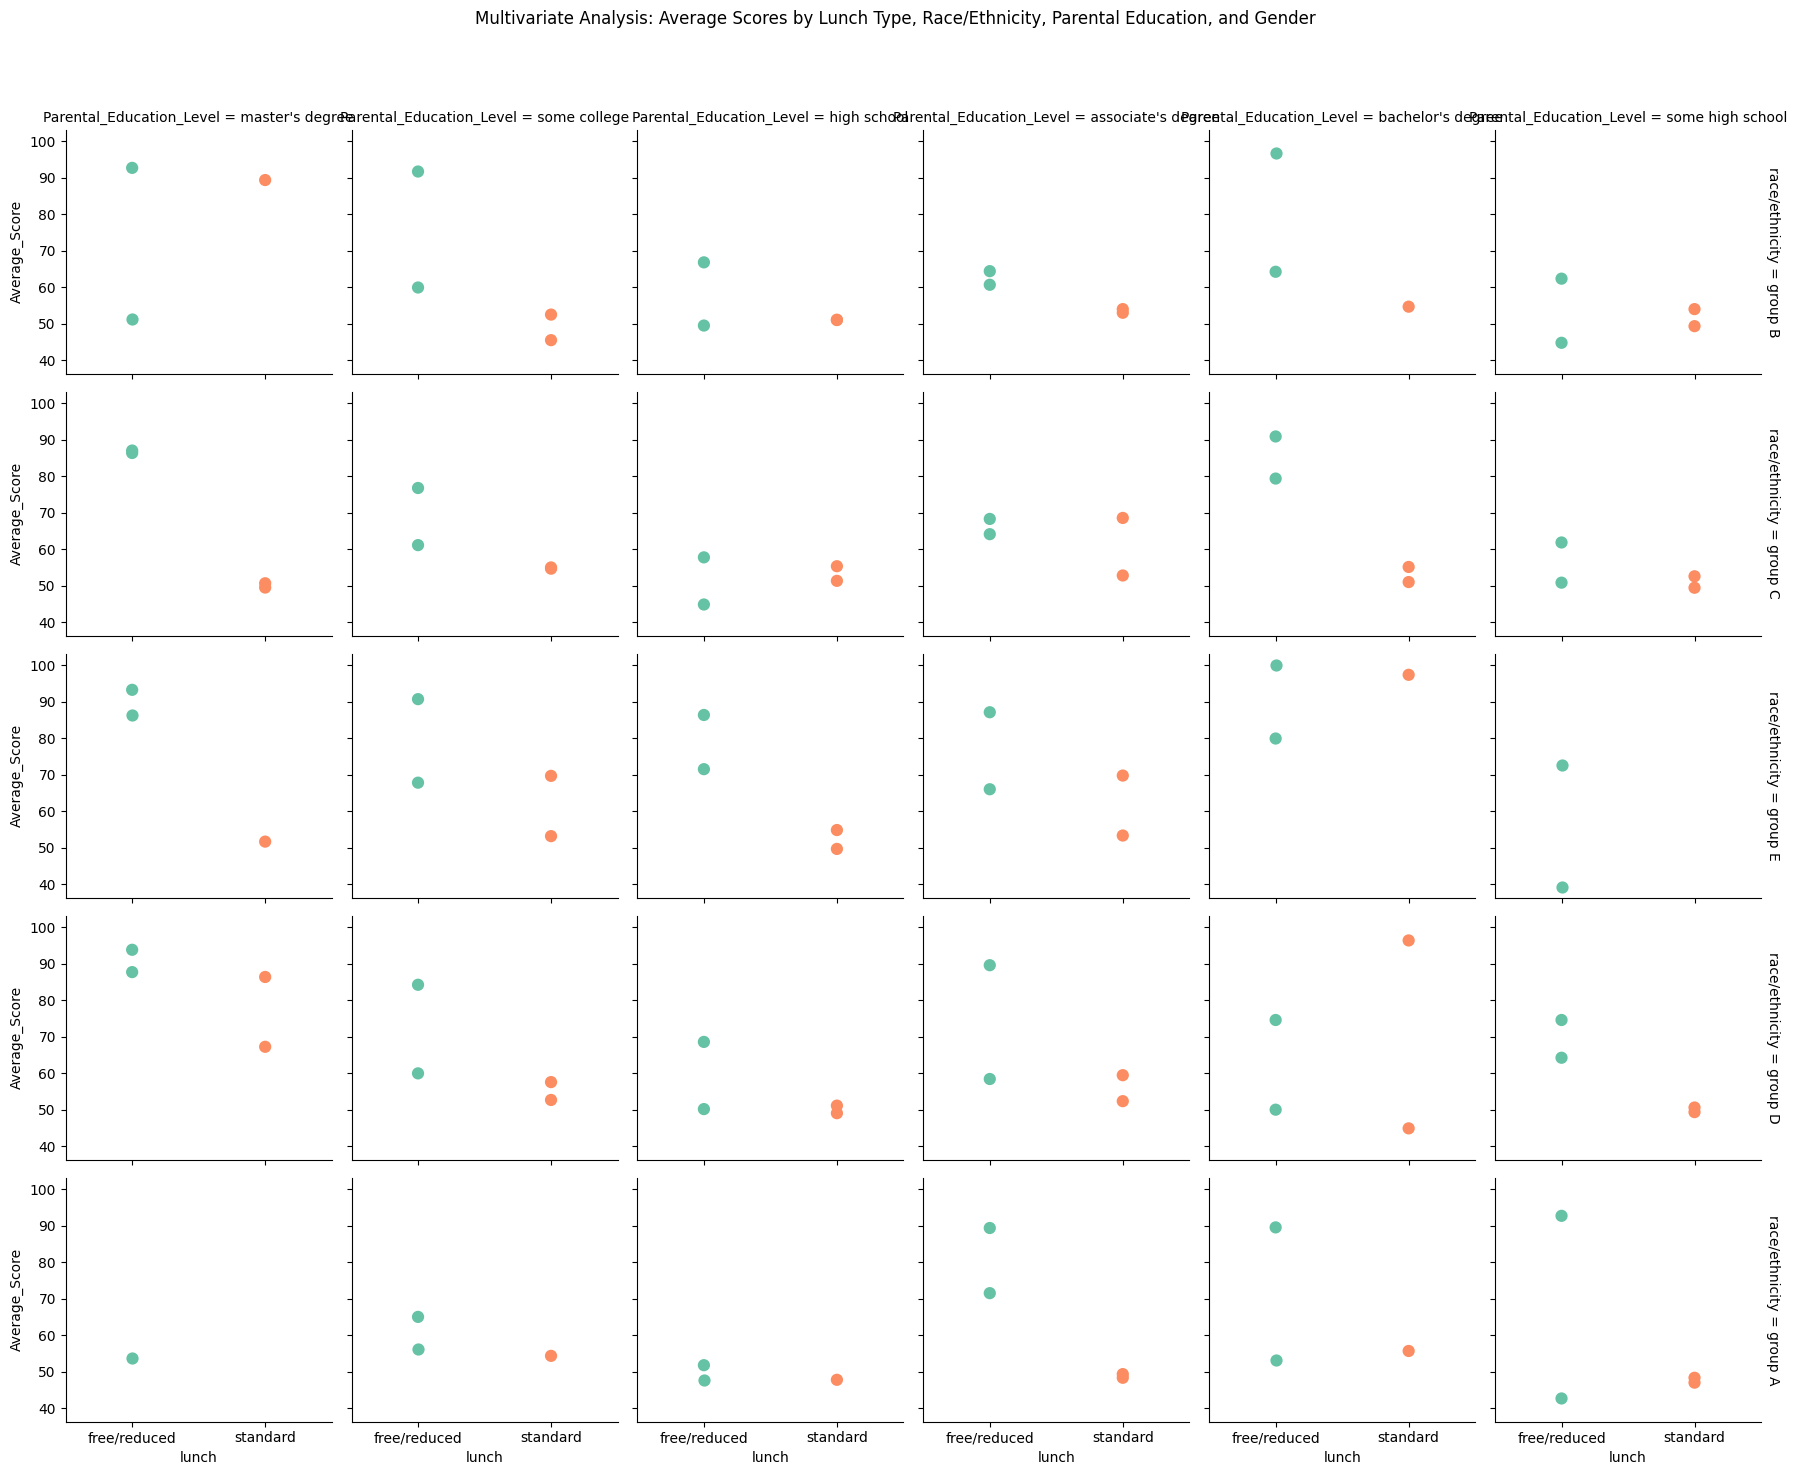

In [38]:
# FacetGrid for Multivariate Analysis with 4 categorical variables and 1 numeric column
g = sns.FacetGrid(
    combined_df, 
    row="race/ethnicity", 
    col="Parental_Education_Level", 
    hue="gender",
    margin_titles=True
)

# Mapping a point plot to the grid
g.map(sns.pointplot, "lunch", "Average_Score", ci=None, palette="Set2")

# Adding a title and adjusting the layout
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Multivariate Analysis: Average Scores by Lunch Type, Race/Ethnicity, Parental Education, and Gender')

# Displaying the plot
plt.show()


Question -4: How does completing the test preparation course affect performance differently across gender, race, and parental education

In [23]:
testprep_analysis_df_cleaned.describe()

Math_Score  Reading_Score  Writing_Score  Average_Score
count  985.000000     985.000000     985.000000     985.000000
mean    66.696447      69.715736      68.642640      68.351607
std     14.347964      13.915848      14.433412      13.465449
min     27.000000      31.000000      32.000000      31.000000
25%     57.000000      60.000000      58.000000      58.666667
50%     67.000000      70.000000      69.000000      68.666667
75%     77.000000      80.000000      79.000000      78.000000
max    100.000000     100.000000     100.000000     100.000000

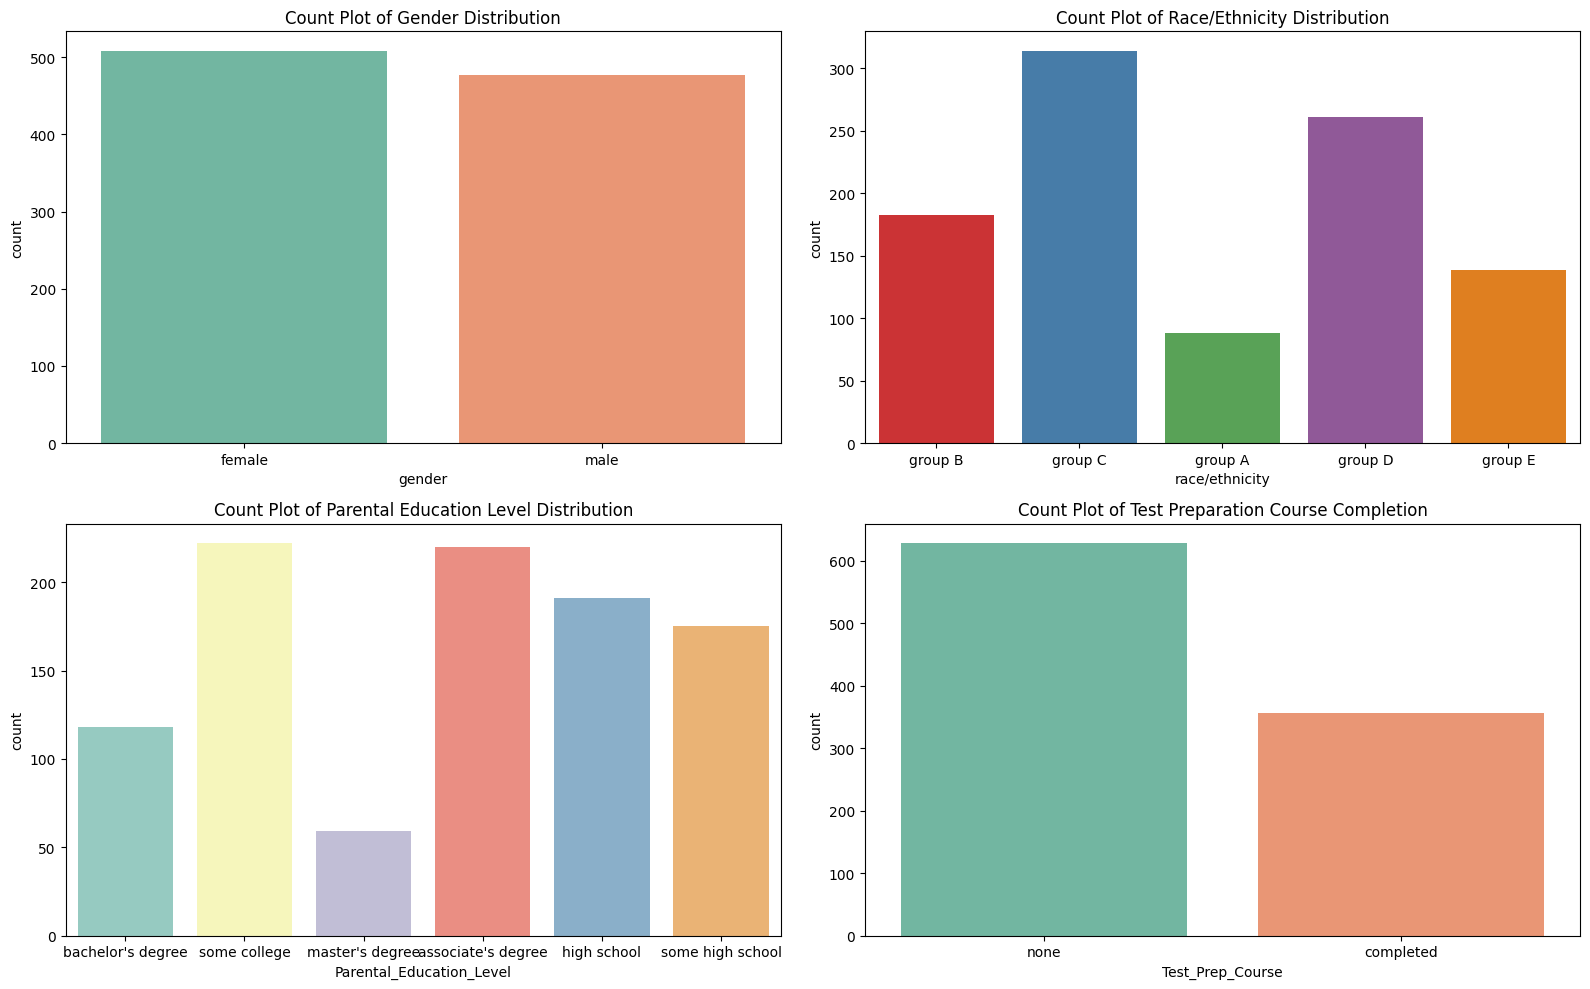

In [39]:

# Univariate Analysis - Count Plots for Gender, Race/Ethnicity, Parental Education, and Test Prep Course
plt.figure(figsize=(16, 10))

# Count plot for Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='gender', data=testprep_analysis_df_cleaned, palette='Set2')
plt.title('Count Plot of Gender Distribution')

# Count plot for Race/Ethnicity Distribution
plt.subplot(2, 2, 2)
sns.countplot(x='race/ethnicity', data=testprep_analysis_df_cleaned, palette='Set1')
plt.title('Count Plot of Race/Ethnicity Distribution')

# Count plot for Parental Education Level
plt.subplot(2, 2, 3)
sns.countplot(x='Parental_Education_Level', data=testprep_analysis_df_cleaned, palette='Set3')
plt.title('Count Plot of Parental Education Level Distribution')

# Count plot for Test Preparation Course
plt.subplot(2, 2, 4)
sns.countplot(x='Test_Prep_Course', data=testprep_analysis_df_cleaned, palette='Set2')
plt.title('Count Plot of Test Preparation Course Completion')

plt.tight_layout()
plt.show()


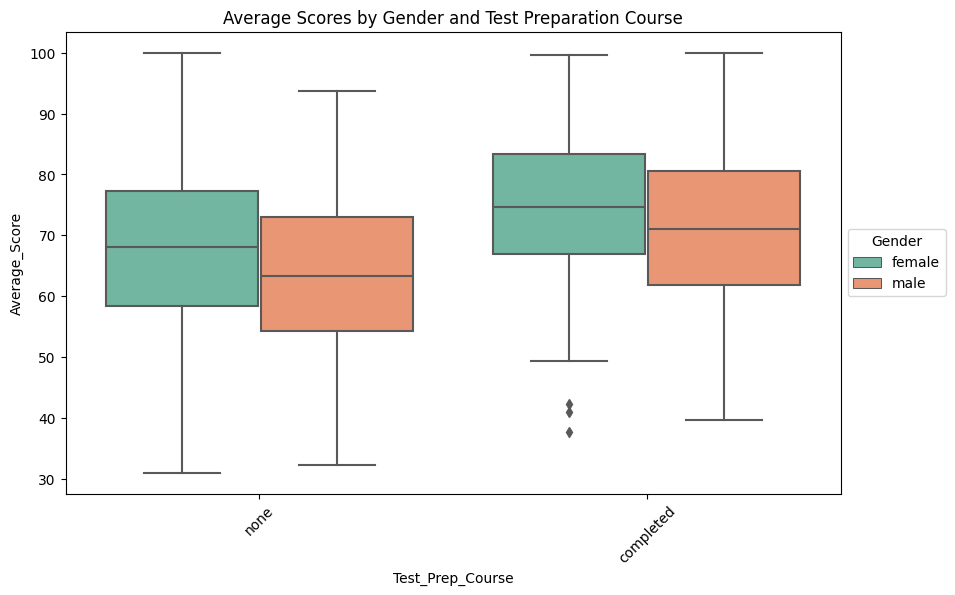

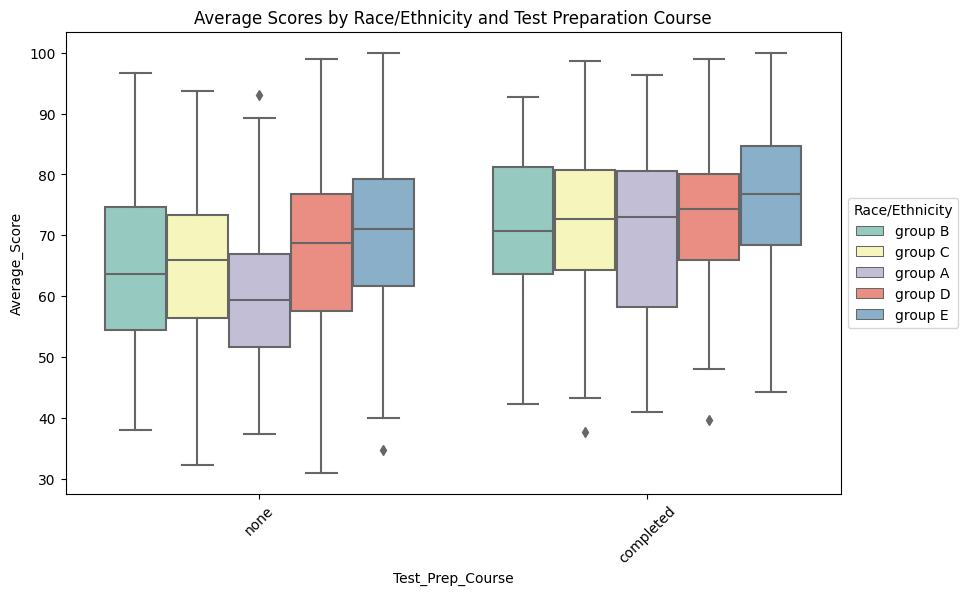

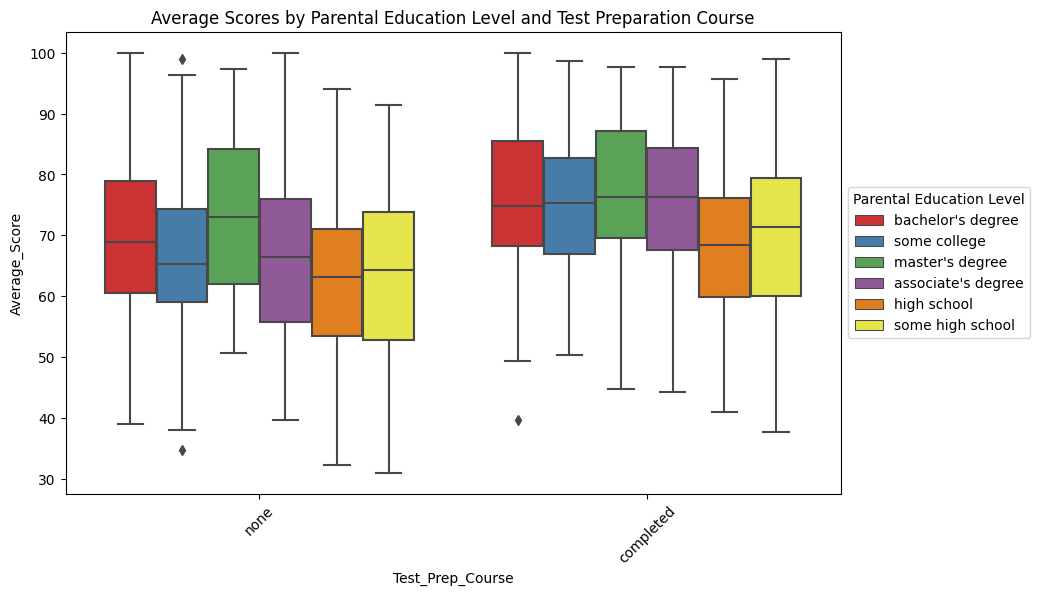

In [40]:
# Bivariate Analysis
# Box plot for Average Scores by Gender and Test Prep Course (with legend moved to the left)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Test_Prep_Course', y='Average_Score', hue='gender', data=testprep_analysis_df_cleaned, palette='Set2')
plt.title('Average Scores by Gender and Test Preparation Course')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Gender")
plt.show()

# Box plot for Average Scores by Race/Ethnicity and Test Prep Course (with legend moved to the left)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Test_Prep_Course', y='Average_Score', hue='race/ethnicity', data=testprep_analysis_df_cleaned, palette='Set3')
plt.title('Average Scores by Race/Ethnicity and Test Preparation Course')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Race/Ethnicity")
plt.show()

# Box plot for Average Scores by Parental Education Level and Test Prep Course (with legend moved to the left)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Test_Prep_Course', y='Average_Score', hue='Parental_Education_Level', data=testprep_analysis_df_cleaned, palette='Set1')
plt.title('Average Scores by Parental Education Level and Test Preparation Course')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Parental Education Level")
plt.show()


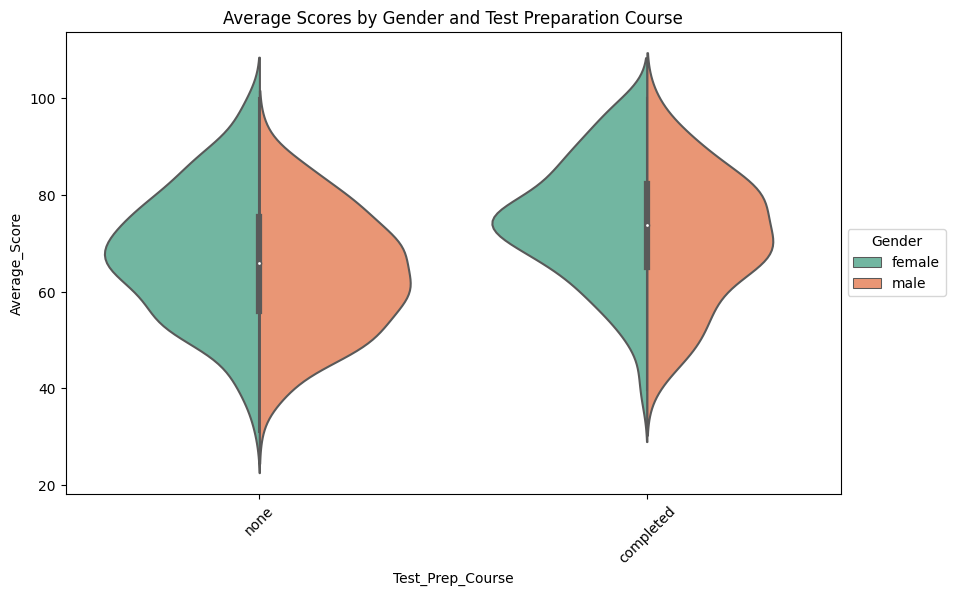

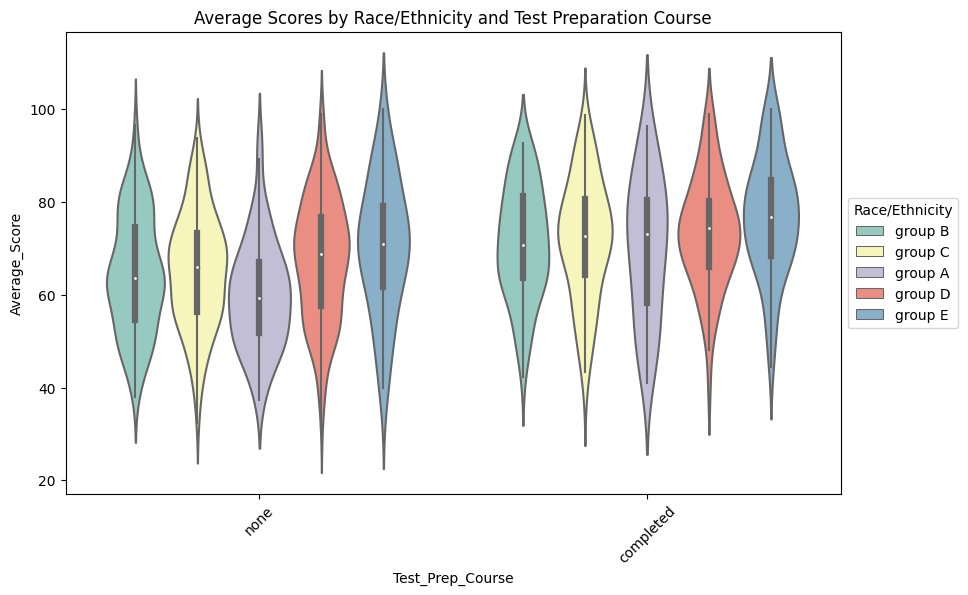

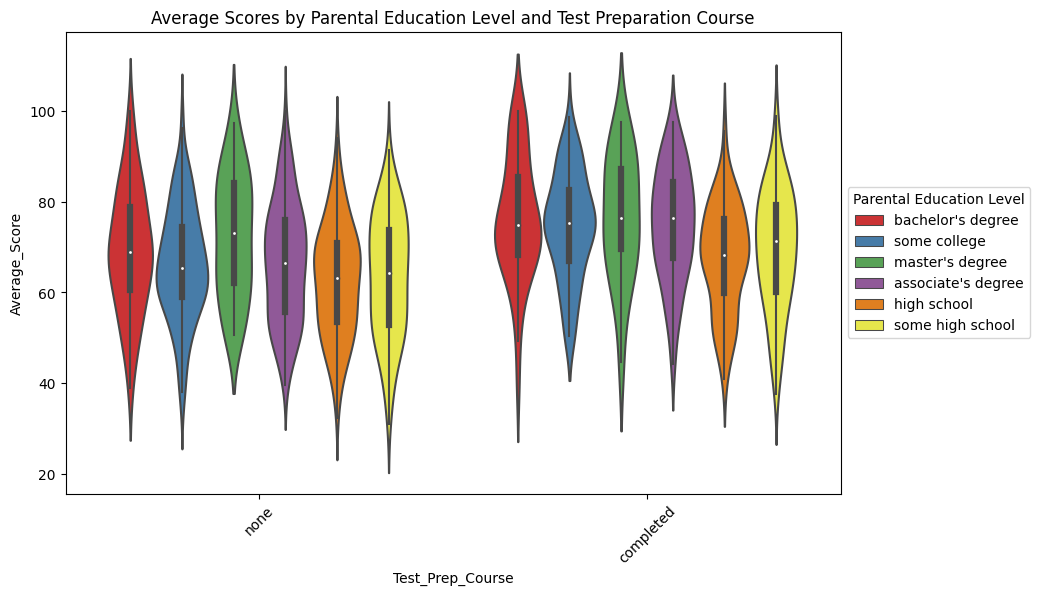

In [41]:
# Violin plot for Average Scores by Gender and Test Preparation Course (split because gender has 2 levels)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Test_Prep_Course', y='Average_Score', hue='gender', data=testprep_analysis_df_cleaned, palette='Set2', split=True)
plt.title('Average Scores by Gender and Test Preparation Course')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Gender")
plt.show()

# Violin plot for Average Scores by Race/Ethnicity and Test Preparation Course (no split because more than 2 levels in race/ethnicity)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Test_Prep_Course', y='Average_Score', hue='race/ethnicity', data=testprep_analysis_df_cleaned, palette='Set3')
plt.title('Average Scores by Race/Ethnicity and Test Preparation Course')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Race/Ethnicity")
plt.show()

# Violin plot for Average Scores by Parental Education Level and Test Preparation Course (no split because more than 2 levels in parental education)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Test_Prep_Course', y='Average_Score', hue='Parental_Education_Level', data=testprep_analysis_df_cleaned, palette='Set1')
plt.title('Average Scores by Parental Education Level and Test Preparation Course')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Parental Education Level")
plt.show()


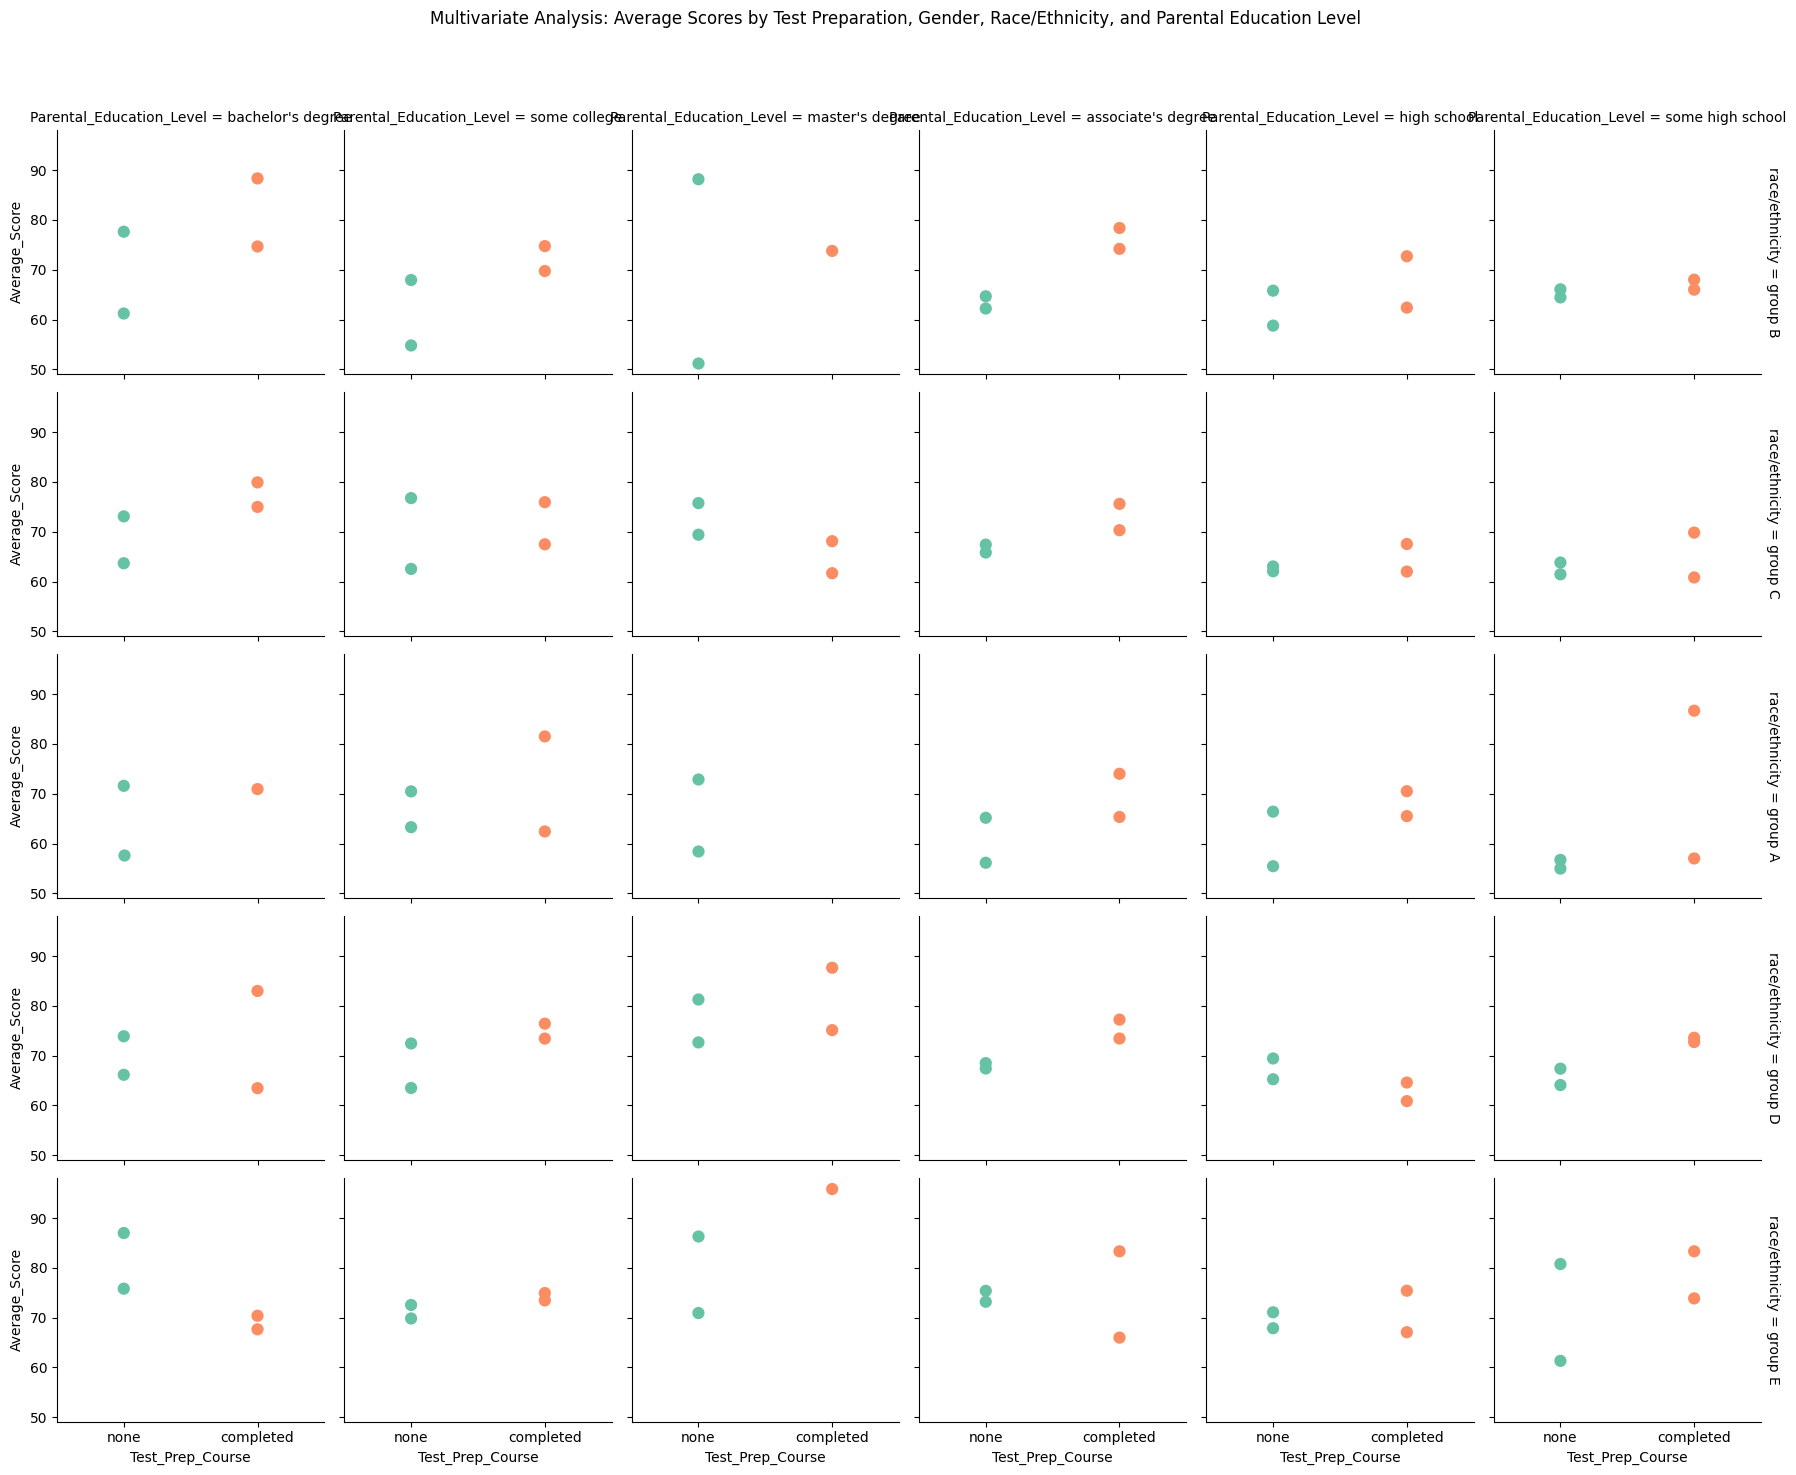

In [42]:
# FacetGrid for Multivariate Analysis: Test Preparation, Gender, Race, Parental Education, and Scores
g = sns.FacetGrid(
    testprep_analysis_df_cleaned, 
    row="race/ethnicity", 
    col="Parental_Education_Level", 
    hue="gender",
    margin_titles=True
)

# Mapping a point plot to the grid
g.map(sns.pointplot, "Test_Prep_Course", "Average_Score", ci=None, palette="Set2")

# Adding a title and adjusting the layout
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Multivariate Analysis: Average Scores by Test Preparation, Gender, Race/Ethnicity, and Parental Education Level')

# Displaying the plot
plt.show()


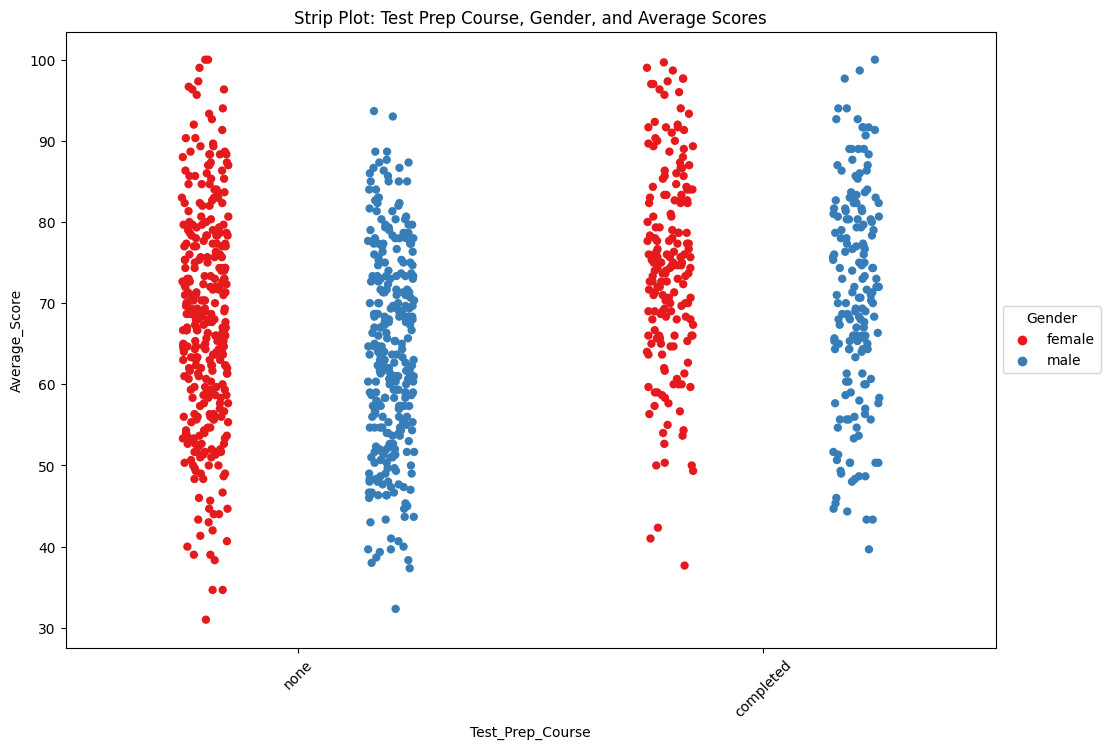

In [43]:
# Strip plot for Average Scores by Test Preparation, Gender, Race/Ethnicity, and Parental Education Level
plt.figure(figsize=(12, 8))

# Creating the strip plot
sns.stripplot(x='Test_Prep_Course', y='Average_Score', hue='gender', 
              data=testprep_analysis_df_cleaned, 
              dodge=True, jitter=True, palette='Set1', size=6)

# Adding a title and rotating the x-ticks
plt.title('Strip Plot: Test Prep Course, Gender, and Average Scores')
plt.xticks(rotation=45)

# Positioning the legend to the left
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Gender')
plt.show()


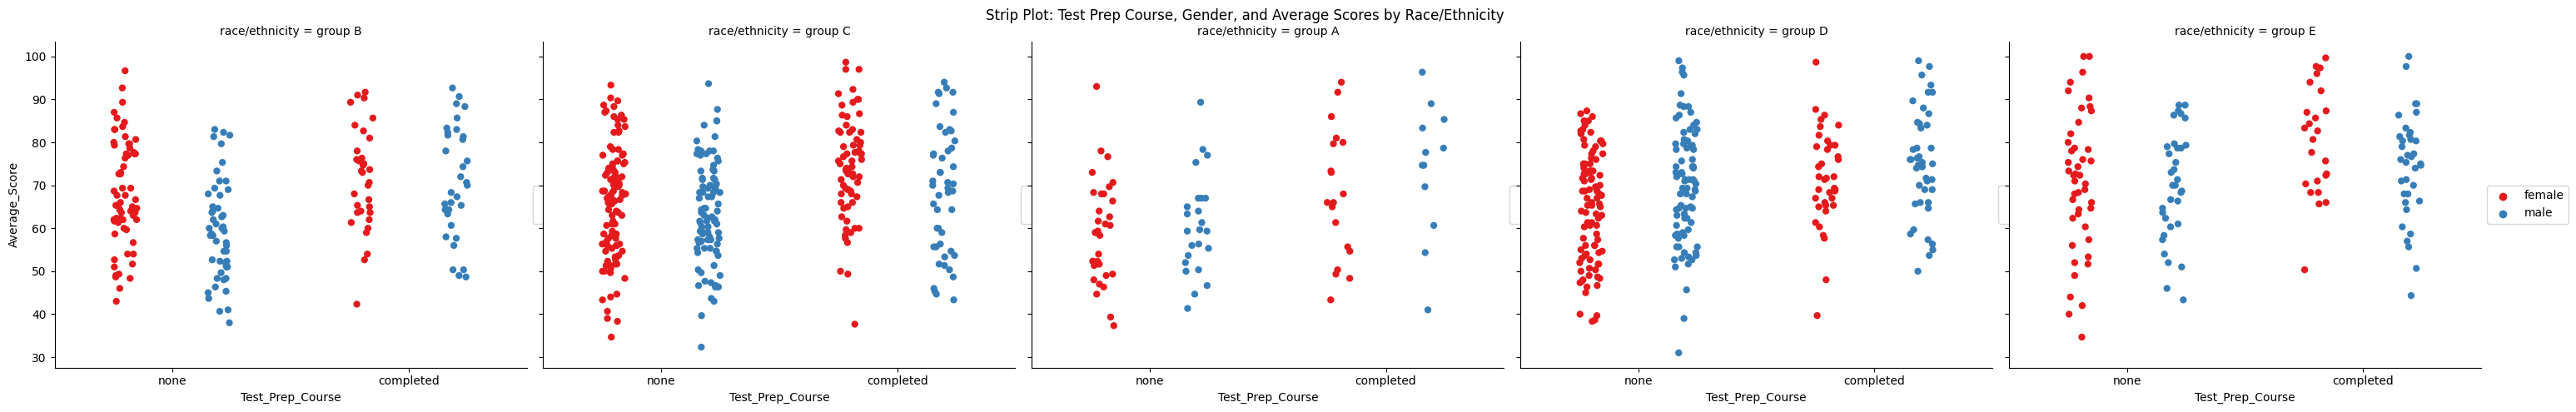

In [44]:
# FacetGrid for Multivariate Strip Plot with Race/Ethnicity included
g = sns.FacetGrid(testprep_analysis_df_cleaned, col='race/ethnicity', height=5, aspect=1.2)

# Mapping the strip plot to the grid
g.map(sns.stripplot, 'Test_Prep_Course', 'Average_Score', 'gender', dodge=True, jitter=True, palette='Set1', size=6)

# Adding the title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Strip Plot: Test Prep Course, Gender, and Average Scores by Race/Ethnicity')

# Adjusting legend positioning for each facet
for ax in g.axes.flat:
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## 4. Conclusion 

# Answer the questions

## Question 1 Insights



1. Univariate Analysis Insights:

- Gender Distribution: From the pie chart, the dataset has a slightly higher proportion of female students compared to male students (~51% female, ~49% male).

- Parental Education Level Distribution: The Parental Education Level pie chart shows that the majority of parents have completed high school or some college, with fewer parents holding a bachelor's degree or higher. This suggests that most students come from families where the parental education level is moderate to low.

- Average Score Distribution: The box plot for the average score shows a slightly skewed distribution, with a concentration of students scoring between 60 and 80. There are some outliers at both the high and low ends, indicating variability in performance.

- Subject-Specific Distributions: The histograms for Math, Reading, and Writing Scores show that most students score in the mid-range (60–80). The distribution for writing and reading is slightly more concentrated, whereas math scores show more variability.

2. Bivariate Analysis Insights:

- Pairplot (Gender and Scores): The pairplot with gender shows that female students tend to perform better in reading and writing, while the difference in math performance between males and females is less pronounced. Female students cluster higher in reading and writing scores.
  
- Pairplot (Parental Education Level and Scores): The pairplot shows that students whose parents have a higher education level (bachelor's degree or higher) tend to perform better in all subjects. There is a clear upward shift in the performance of these students compared to those whose parents have a lower level of education.

- Bar Plots (Scores by Gender and Parental Education Level):
>> - Math Scores: Male students have slightly higher math scores on average across most parental education levels, especially at higher parental education levels.
>> - Reading and Writing Scores: Female students outperform male students in both reading and writing across all parental education levels. The effect of parental education is more pronounced in these subjects, where students with more educated parents perform significantly better.
>>  - Overall: The difference in performance between genders is most pronounced in reading and writing, with females consistently scoring higher, while the gap in math is smaller.

3. Multivariate Analysis Insights:

- Heatmap (Gender, Parental Education, and Scores): The heatmap reveals clear trends where students whose parents have higher education levels (e.g., master's degree) tend to perform better across all subjects, regardless of gender. Females consistently score higher in reading and writing, while males perform slightly better in math, especially when their parents have a lower level of education. However, for students whose parents have a higher education level, the performance gap between genders in math diminishes.

- PCA (Projection of Scores by Gender and Parental Education Level): The PCA scatter plot shows distinct clusters based on gender and parental education level. Students with higher parental education levels tend to cluster in the upper regions of the PCA space, indicating higher overall performance in math, reading, and writing. Gender differences are still evident, with female students clustering higher for reading and writing, but the effect of parental education is a stronger determinant of performance across subjects.


## Question 2 Insights

1. Univariate Analysis Insights:

- Lunch Type Distribution: The pie chart shows that around 65% of students receive free/reduced lunch, while the remaining 35% receive standard lunch. This indicates a socio-economic divide, with the majority of students coming from lower-income backgrounds.

- Test Preparation Course Completion: About 65% of students did not complete a test preparation course, while 35% did. This suggests that a significant portion of students do not have access to or do not take advantage of test preparation programs.

- Scores Distribution: The box plot for scores shows considerable variability across all subjects. Math scores have a wider range, while reading and writing scores are more concentrated in the 60-80 range, with some outliers.

2. Bivariate Analysis Insights:

- Pairplot (Lunch Type and Scores): Students with standard lunch tend to score higher in math, reading, and writing compared to students with free/reduced lunch. There are clear separations in the clusters, especially in reading and writing. Free/reduced lunch students tend to have lower overall scores, indicating that socio-economic factors (proxied by lunch type) play a significant role in academic performance.

- Pairplot (Test Prep Course Completion and Scores): Students who completed the test preparation course perform better in all subjects, but the effect is more pronounced for math scores.
The reading and writing scores also improve with test preparation, but the difference between those who completed the course and those who didn’t is smaller in these subjects compared to math.

- Bar Plots (Lunch Type and Test Preparation Course):

>> - Math Scores: Students with standard lunch who completed the test preparation course have the highest math scores. The effect of the course is less pronounced for students with free/reduced lunch.
>> - Reading and Writing Scores: The same pattern is observed, with standard lunch students performing better, especially when they have completed the test preparation course.

- Histograms: The histograms reinforce the bar plot insights, showing that students with standard lunch and test prep completion have higher scores. However, the overlap between the groups suggests that test preparation may not fully overcome the impact of socio-economic factors.

3. Multivariate Analysis Insights:
- Heatmap: The heatmap shows that students with standard lunch and test preparation course completion have the highest average scores across math, reading, and writing. In contrast, students with free/reduced lunch who did not complete the test prep course have the lowest scores.
This highlights the combined effect of socio-economic status and test preparation, with socio-economic status playing a dominant role.

- PCA (Projection of Scores): The PCA scatter plot reveals clear clusters based on lunch type and test prep completion. Students with standard lunch and test prep completion cluster towards higher scores in the PCA space, while students with free/reduced lunch and no test prep cluster towards lower scores. The separation of clusters reinforces the idea that both factors—lunch type and test preparation course completion—play significant roles in student performance.


## Question 3 Insights

1. Univariate Analysis:

- Gender Distribution: The count of males and females is almost evenly distributed between high and low performers. This suggests that gender does not strongly influence whether a student falls into the high or low performer category. Both males and females are equally represented across performance levels.

- Parental Education Level: Students whose parents have higher education (bachelor’s degree or higher) are more likely to be high performers, while students whose parents have only completed high school or some college tend to be low performers. Parental education level plays a critical role in determining student performance, likely due to the support and learning environment provided at home.

- Lunch Type: Students who receive free/reduced lunch (a proxy for lower socio-economic status) are more likely to be low performers. Conversely, students who do not receive free lunch (standard lunch) are more likely to be high performers. Socio-economic factors such as access to resources, which can be inferred from lunch type, are strongly correlated with academic performance.

- Race/Ethnicity: Some race/ethnicity groups show higher representation in either the high or low performer categories, though this varies by group.
There are differences in academic performance across different race/ethnicity groups, which could be influenced by a variety of socio-economic, cultural, and educational factors.


2. Bivariate Analysis:

- Average Scores by Gender and Performance Level: Both male and female students show similar trends, with high performers scoring significantly higher than low performers. Gender alone does not appear to drastically influence performance; the gap between high and low performers is consistent across both genders.

- Average Scores by Parental Education Level and Performance Level: High performers are concentrated among students whose parents have a bachelor’s degree or higher, while low performers are associated with parents who have lower educational attainment. Higher parental education level is a strong predictor of better student performance. This could be due to greater emphasis on academic success, access to resources, or role modeling by parents.

- Average Scores by Lunch Type and Performance Level: Students receiving free/reduced lunch (lower socio-economic status) have significantly lower average scores, while those with standard lunch (higher socio-economic status) tend to be high performers. Socio-economic status, indicated by lunch type, has a clear influence on student performance, with lower-income students more likely to underperform academically.

- Average Scores by Race/Ethnicity and Performance Level: There are variations in performance across different racial/ethnic groups. For instance, certain groups show a higher concentration of high performers, while others have a higher proportion of low performers. Performance levels appear to be influenced by race/ethnicity, likely reflecting broader socio-economic and educational disparities.

3. Multivariate Analysis:

- Multivariate Catplot: The catplot shows that the test preparation course has a noticeable positive impact on students' average scores across gender, parental education, lunch type, and race/ethnicity. Completion of the test preparation course tends to level the playing field across different demographic groups, though some variation still exists due to socio-economic factors.

- FacetGrid for Average Scores by Lunch Type, Gender, Race/Ethnicity, and Parental Education Level: In many instances, students with standard lunch perform better than those receiving free/reduced lunch, especially when comparing across gender and parental education levels. Additionally, higher parental education is consistently linked with better performance, regardless of lunch type or race/ethnicity. This reinforces the idea that socio-economic status (as indicated by lunch type) and parental education are critical factors in determining student success, while gender and race/ethnicity also influence performance to a lesser extent.



## Question 4 Insights

1. Univariate Analysis:

- Gender: The gender distribution is quite balanced with a slight tilt towards female students. This ensures that gender-related analysis is not biased by an underrepresentation of either gender.

- Race/Ethnicity: There are significant differences in the number of students from different racial/ethnic groups. Group C appears to be the most represented, while other groups like Group A and Group E have fewer students. This distribution may affect how race/ethnicity influences performance when combined with other variables.

- Parental Education: The majority of students come from families where the highest level of parental education is some college or a bachelor’s degree. A smaller percentage have parents with graduate-level education. This suggests that a large portion of students might not have access to higher academic support at home, which could influence their overall performance.

- Test Preparation Course: Most students did not complete the test preparation course. This imbalance in completion rates suggests that any observed performance differences will likely highlight the benefits of the course for those who completed it. However, the lower rate of completion should be noted as it limits the sample size for students who completed the course.

2. Bivariate Analysis:

- Average Scores by Gender and Test Preparation Course: Both male and female students who completed the test preparation course tend to score higher, but the increase in performance is more significant among females. The test preparation course positively affects both genders, but there may be additional factors influencing female students to perform better.

- Average Scores by Race/Ethnicity and Test Preparation Course: Different race/ethnicity groups show varying improvements after completing the test preparation course. Some groups benefit significantly more from the course. The test preparation course’s effect varies across racial groups, potentially due to socio-economic factors or differences in learning environments.

- Average Scores by Parental Education Level and Test Preparation Course: Students with parents holding a bachelor's degree or higher show marked improvement after completing the test preparation course, while students with lower parental education levels benefit less. The level of parental education significantly influences how much students benefit from the test preparation course, indicating that higher parental involvement could play a role in enhancing student outcomes.


3. Multivariate Analysis:

- FacetGrid for Test Preparation, Gender, Race, and Parental Education: In the multivariate plot with multiple facets, students who completed the test preparation course consistently score higher across gender, race, and parental education level. However, the degree of improvement varies depending on these factors. This indicates that while the test preparation course is generally effective, its success is influenced by additional socio-demographic variables such as race/ethnicity and parental education.

- Strip Plot with Test Preparation, Gender, and Average Scores by Race/Ethnicity: The strip plot shows the individual performance of students, highlighting outliers and trends in score distribution. It is evident that some students perform exceptionally well or poorly, but completing the test preparation course typically shifts scores upward across most racial/ethnic groups. The test preparation course helps boost scores, but race/ethnicity remains a factor that could influence overall performance. This suggests that targeted interventions might be needed to ensure equitable outcomes.


## 5. Summary

(summarize your results) 

## Question 1 Summary

- Parental Education plays a significant role in determining student performance across all subjects. Students with parents holding higher education degrees tend to perform better in math, reading, and writing.
- Gender influences performance in reading and writing, with females generally outperforming males in these subjects. The gender gap is narrower in math, with male students having a slight edge, but parental education seems to mitigate this gap.
- The PCA analysis further highlights the combined influence of gender and parental education on overall student performance, where students from more educated families cluster higher in the performance spectrum, regardless of gender.

## Question 2 Summary

- Socio-Economic Status (Lunch Type): Students with standard lunch consistently outperform students with free/reduced lunch in all subjects. This suggests that socio-economic factors are a major determinant of student performance, affecting all aspects of academic achievement.

- Test Preparation Course Completion: Completing the test preparation course has a positive impact on student performance, particularly in math. However, this impact is less pronounced for students from disadvantaged socio-economic backgrounds.

- Combined Effect: The combined effect of standard lunch and test prep completion leads to the highest academic performance. However, free/reduced lunch students, even with test preparation, do not fully close the performance gap, highlighting the need for broader interventions.

These insights provide a comprehensive understanding of how lunch type and test preparation course completion together influence student performance in math, reading, and writing.

## Question 3 Summary

- Parental Education is a strong determinant of student success. Students whose parents have higher levels of education (bachelor’s degree or higher) are more likely to be high performers.
- Socio-economic Status, as indicated by the type of lunch (free/reduced vs. standard), plays a significant role in performance. Students from lower-income families tend to perform worse than their peers from higher-income families.
- Race/Ethnicity shows differences in performance, with some groups showing a higher concentration of low performers, likely due to broader socio-economic and educational disparities.
- Gender is not a strong factor in determining whether a student is a high or low performer. Both male and female students show similar performance trends.
- Test Preparation Course completion has a positive effect on students’ average scores, though its impact may vary across different demographic groups.

These insights highlight the complex interaction of demographic factors, socio-economic status, and family background in determining academic performance. By addressing these disparities, schools can better target interventions to support underperforming students.



## Question 4 Summary

- Females benefit slightly more than males.
- Some racial/ethnic groups show greater improvement than others, suggesting socio-economic or cultural differences might play a role.
- Students with parents having higher education levels tend to benefit more from the test preparation course, possibly due to the additional support and resources provided at home.
- Socio-economic factors (inferred from parental education and race/ethnicity) still influence performance even after completing the test preparation course, suggesting that simply providing test preparation might not fully address underlying disparities.
- Parental education is a crucial determinant in a student's success after completing the test preparation course, indicating the importance of involving parents in academic support systems.

These insights suggest that while test preparation courses are beneficial, additional support mechanisms targeting specific socio-demographic groups could be necessary to ensure all students benefit equally.

## References

> provide a list of references

1. Dataset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

2. EDA Tutorial: https://www.datacamp.com/tutorial/exploratory-data-analysis-python

3. Matplotlib getting started: https://www.w3schools.com/python/matplotlib_getting_started.asp

4. Seaborn plots: https://seaborn.pydata.org/generated/seaborn.catplot.html

5. Pandas Tutorial: https://www.w3schools.com/python/pandas/default.asp

6. Outlier Detection: https://www.scribbr.com/statistics/outliers/